# **Prediction of Nephropathy in Diabetic Patients**
---
Amira Ghina Nurfansepta (215150201111026)

## **Data Understanding**

### **Import Library**

In [ ]:
pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import HuberRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingRegressor

import time
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Penelitian/data_pasien_diabetes.csv')
df.head()

Name  Patient ID  Age  Creatinine Semi-quantitative UACR  \
0  Adinda Maya Vidianti    11539264   20        0.91                    NaN   
1        Geraldi Satria    11561505    4         NaN                    NaN   
2        Yuni Setyowati    11561162   41         NaN                  >=300   
3                  Ulfa    11224476   26        3.17                  >=300   
4        Dalifa Fatimah    11323947   28      140.40                    NaN   

   Urinary Creatinine  Quantitative UACR  Urinary Albumin  
0                68.3             194.20           103.27  
1                21.8             251.00            54.80  
2                23.7              32.62            77.20  
3                56.3            1110.90            62.49  
4               140.4             240.00           336.90

### **Number of Rows and Columns**

In [ ]:
print("Number of rows =", df.shape[0])
print("Number of columns =", df.shape[1])

Number of rows = 500
Number of columns = 8


### **Dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    500 non-null    object 
 1   Patient ID              500 non-null    int64  
 2   Age                     500 non-null    int64  
 3   Creatinine              340 non-null    float64
 4   Semi-quantitative UACR  318 non-null    object 
 5   Urinary Creatinine      500 non-null    float64
 6   Quantitative UACR       495 non-null    float64
 7   Urinary Albumin         499 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 31.4+ KB


### **Descriptive Statistics**

**Numerical Column**

In [ ]:
df.describe()

Patient ID         Age  Creatinine  Urinary Creatinine  \
count  5.000000e+02  500.000000  340.000000          500.000000   
mean   1.083715e+07   32.046000    1.413853          130.517820   
std    2.499121e+06   13.084276    7.638400          345.006133   
min    2.081300e+05    3.000000    0.200000            0.300000   
25%    1.135895e+07   22.000000    0.590000           42.500000   
50%    1.149944e+07   29.000000    0.715000           79.100000   
75%    1.154286e+07   39.000000    0.962500          139.275000   
max    1.158394e+07   82.000000  140.400000         5022.200000   

       Quantitative UACR  Urinary Albumin  
count         495.000000       499.000000  
mean         1326.601111       865.203848  
std          6914.953062      2130.941434  
min             1.900000         0.550000  
25%            21.450000        15.450000  
50%           132.100000        87.700000  
75%           705.300000       503.200000  
max        121845.570000     14267.400000

**Categorical Column**

In [ ]:
df.describe(include='object')

Name Semi-quantitative UACR
count                    500                    318
unique                   363                     14
top     Adinda Maya Vidianti                    <30
freq                       6                     77

### **Duplicated Data**

In [ ]:
print("Number of duplicate data in the dataset:", df.duplicated().sum())

display(df[df.duplicated()])
df[df['Name'] == "Adinda Maya Vidianti"]

Number of duplicate data in the dataset: 1


Name  Patient ID  Age  Creatinine Semi-quantitative UACR  \
403  Adinda Maya Vidianti    11539264   20        0.82                    NaN   

     Urinary Creatinine  Quantitative UACR  Urinary Albumin  
403                76.5              132.1            101.0

Name  Patient ID  Age  Creatinine Semi-quantitative UACR  \
0    Adinda Maya Vidianti    11539264   20        0.91                    NaN   
92   Adinda Maya Vidianti    11539264   20        0.95                     80   
193  Adinda Maya Vidianti    11539264   21        0.73                    150   
336  Adinda Maya Vidianti    11539264   20        0.82                    NaN   
403  Adinda Maya Vidianti    11539264   20        0.82                    NaN   
469  Adinda Maya Vidianti    11539264   20        0.62                    NaN   

     Urinary Creatinine  Quantitative UACR  Urinary Albumin  
0                  68.3              194.2           103.27  
92                113.8              117.4           133.60  
193               115.7              121.3           140.40  
336                76.5              132.1           101.00  
403                76.5              132.1           101.00  
469                24.2              174.7            42.20

There is a duplication of data on Adinda Maya Vidianti, so it must be deleted.

### **Missing Value**

In [ ]:
df.isna().sum()

Name                        0
Patient ID                  0
Age                         0
Creatinine                160
Semi-quantitative UACR    182
Urinary Creatinine          0
Quantitative UACR           5
Urinary Albumin             1
dtype: int64

There are many missing values in columns Creatinine and Semi-quantitative UACR, so imputation is necessary. In addition, there are few missing values in columns Quantitative UACR and Urinary Albumin, so they need to be dropped.

## **Data Preprocessing**

### **Remove Duplicated Data**

In [ ]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

### **Drop Missing Value**

In [ ]:
df = df.dropna(subset=['Urinary Albumin', 'Quantitative UACR'])
df.isna().sum()

Name                        0
Patient ID                  0
Age                         0
Creatinine                156
Semi-quantitative UACR    178
Urinary Creatinine          0
Quantitative UACR           0
Urinary Albumin             0
dtype: int64

### **Input Missing Value**

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

knn_imputer = KNNImputer(n_neighbors=2)
simple_imputer = SimpleImputer(strategy='most_frequent')

df_input = df.copy()
df_input['Creatinine'] = knn_imputer.fit_transform(df_input[['Creatinine']])
df_input['Semi-quantitative UACR'] = simple_imputer.fit_transform(df_input[['Semi-quantitative UACR']])
df_input.head()

Name  Patient ID  Age  Creatinine Semi-quantitative UACR  \
0  Adinda Maya Vidianti    11539264   20    0.910000                    <30   
1        Geraldi Satria    11561505    4    1.406627                    <30   
2        Yuni Setyowati    11561162   41    1.406627                  >=300   
3                  Ulfa    11224476   26    3.170000                  >=300   
4        Dalifa Fatimah    11323947   28  140.400000                    <30   

   Urinary Creatinine  Quantitative UACR  Urinary Albumin  
0                68.3             194.20           103.27  
1                21.8             251.00            54.80  
2                23.7              32.62            77.20  
3                56.3            1110.90            62.49  
4               140.4             240.00           336.90

In [ ]:
df_input.isna().sum()

Name                      0
Patient ID                0
Age                       0
Creatinine                0
Semi-quantitative UACR    0
Urinary Creatinine        0
Quantitative UACR         0
Urinary Albumin           0
dtype: int64

Missing values have been filled in df_input.

### **Label Encoding**

In [ ]:
label_encoder = preprocessing.LabelEncoder()

df_input['Semi-quantitative UACR'] = label_encoder.fit_transform(df_input['Semi-quantitative UACR'])

### **Normalization**

In [ ]:
columns_to_normalize = ['Age', 'Creatinine', 'Semi-quantitative UACR', 'Urinary Creatinine', 'Quantitative UACR', 'Urinary Albumin']

scaler = MinMaxScaler()
df_input[columns_to_normalize] = scaler.fit_transform(df_input[columns_to_normalize])
df_input.head()

Name  Patient ID       Age  Creatinine  \
0  Adinda Maya Vidianti    11539264  0.215190    0.005064   
1        Geraldi Satria    11561505  0.012658    0.008606   
2        Yuni Setyowati    11561162  0.481013    0.008606   
3                  Ulfa    11224476  0.291139    0.021184   
4        Dalifa Fatimah    11323947  0.316456    1.000000   

   Semi-quantitative UACR  Urinary Creatinine  Quantitative UACR  \
0                0.461538            0.013541           0.001578   
1                0.461538            0.004281           0.002044   
2                1.000000            0.004660           0.000252   
3                1.000000            0.011151           0.009102   
4                0.461538            0.027898           0.001954   

   Urinary Albumin  
0         0.007200  
1         0.003803  
2         0.005373  
3         0.004342  
4         0.023576

## **Exploratory Data Analysis**

### **Analysing The Features**

**Name**

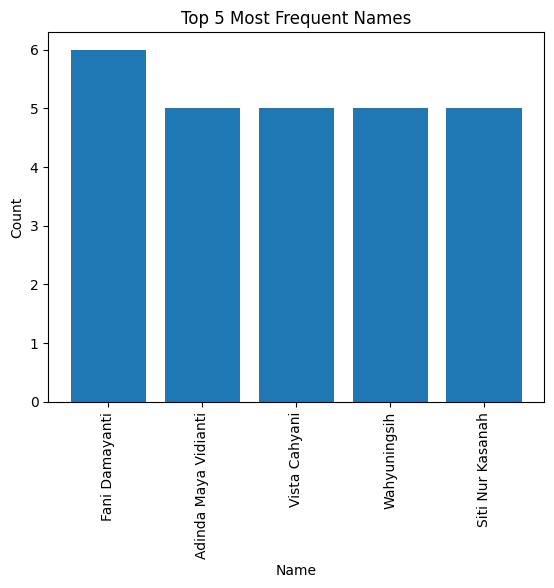

In [ ]:
df_name = df['Name'].value_counts(ascending=False).reset_index()
df_name.columns = ['Name', 'Count']
df_name_head = df_name.head()

plt.bar(df_name_head['Name'], df_name_head['Count'])
plt.xlabel('Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Top 5 Most Frequent Names')
plt.show()

Patient with the most names in the dataset is Fani Damayanti, which is 6 times.

**Patients ID**

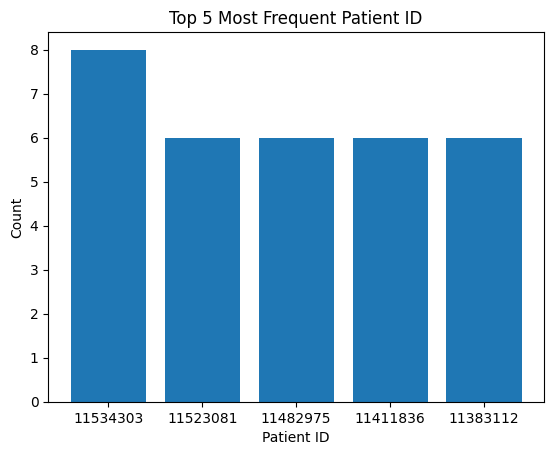

In [ ]:
df_id = df['Patient ID'].value_counts(ascending=False).reset_index()
df_id.columns = ['Patient ID', 'Count']
df_id['Patient ID'] = df_id['Patient ID'].astype(str)
df_id_head = df_id.head()

plt.bar(df_id_head['Patient ID'], df_id_head['Count'])
plt.xlabel('Patient ID')
plt.ylabel('Count')
plt.title('Top 5 Most Frequent Patient ID')
plt.show()

In [ ]:
display(df[df['Patient ID'] == 11534303])
df[df['Patient ID'] == 11523081]

Name  Patient ID  Age  Creatinine Semi-quantitative UACR  \
71            Meytabila    11534303   20        1.61                    NaN   
129          Meytabilla    11534303   20        1.73                     80   
164          Meytabilla    11534303   21        1.59                     80   
187          Meytabilla    11534303   21        1.25                    NaN   
205  Meytabilla Mauludy    11534303   21        1.53                     80   
227          Meytabilla    11534303   21        1.30                     80   
236  Meytabilla Mauludy    11534303   20        2.05                   >300   
321  Meytabilla Mauludy    11534303   20        1.31                   >300   

     Urinary Creatinine  Quantitative UACR  Urinary Albumin  
71                 58.7            1536.40            902.0  
129                53.1              98.70             52.4  
164               178.7              90.00            160.8  
187                28.1             245.10             68.8  
205                56.7             129.10             73.2  
227               120.0              89.17            107.0  
236               177.2             697.50           1235.6  
321               201.0             601.49           1209.0

Name  Patient ID  Age  Creatinine Semi-quantitative UACR  \
37   Wahyunignsih    11523081   28        0.38                  >=300   
77   Wahyunignsih    11523081   28        0.41                 >= 300   
151  Wahyuningsih    11523081   28        0.40                  >=300   
302  Wahyuningsih    11523081   28        0.31                   >300   
349  Wahyuningsih    11523081   28        0.36                  >=300   
378  Wahyuningsih    11523081   28        0.45                    NaN   

     Urinary Creatinine  Quantitative UACR  Urinary Albumin  
37                149.7              267.2            399.8  
77                144.0              509.5            733.7  
151               105.5              237.3            250.2  
302               162.4               42.7             69.4  
349                30.2              753.2            227.7  
378               152.4              112.1            170.8

Patient with the most IDs in the dataset is not the same as the most names. This can occur due to incomplete or typo name writing.

**Age**

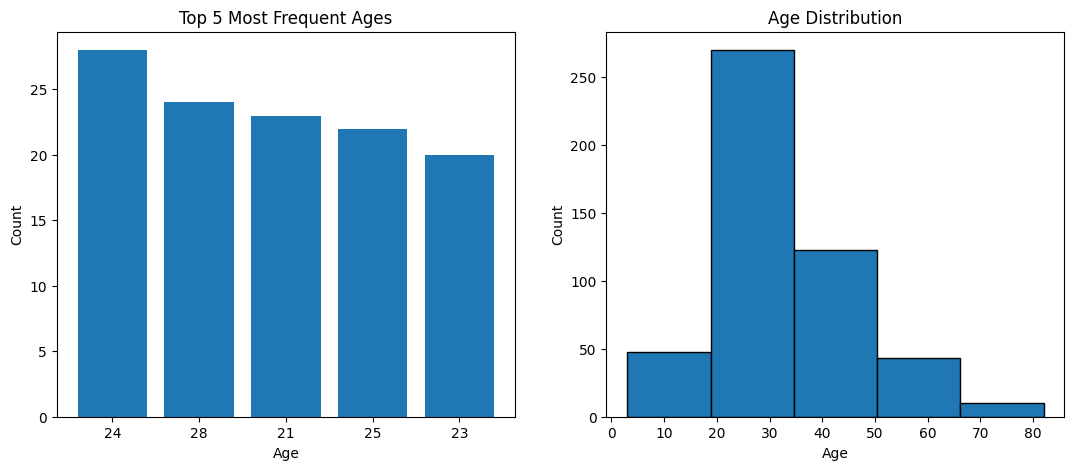

In [ ]:
df_age = df['Age'].value_counts(ascending=False).reset_index()
df_age.columns = ['Age', 'Count']
df_age['Age'] = df_age['Age'].astype(str)
df_age_head = df_age.head()

f,ax=plt.subplots(1, 2, figsize=(13,5))
ax[0].bar(df_age_head['Age'], df_age_head['Count'])
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Count')
ax[0].set_title('Top 5 Most Frequent Ages')
ax[1].hist(df['Age'], bins=5, edgecolor='k')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Count')
ax[1].set_title('Age Distribution')
plt.show()

Patients aged 24 are the most common patients in the dataset.

**Creatinine**

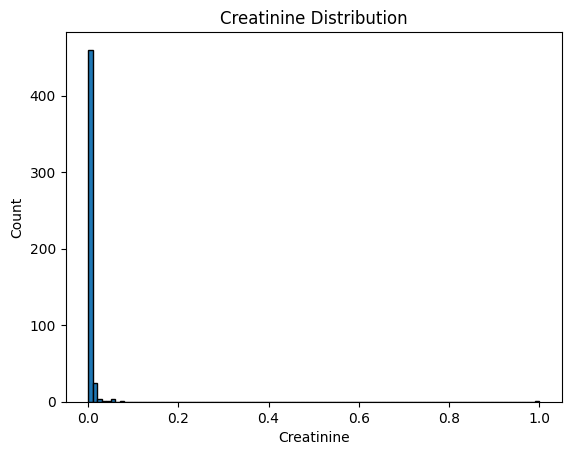

In [ ]:
plt.hist(df_input['Creatinine'], bins=100, edgecolor='k')
plt.xlabel('Creatinine')
plt.ylabel('Count')
plt.title('Creatinine Distribution')
plt.show()

**Semi-quantitative UACR**

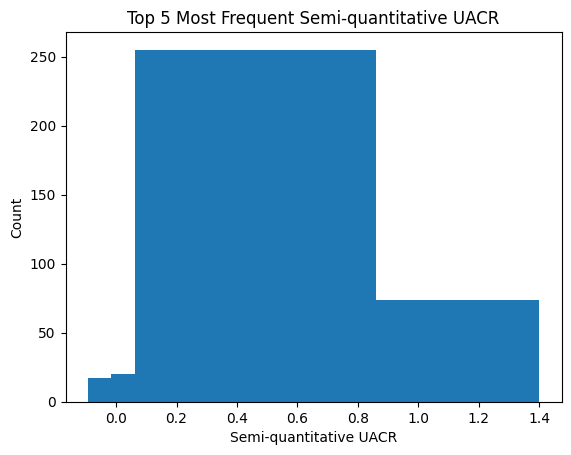

In [ ]:
df_sq = df_input['Semi-quantitative UACR'].value_counts(ascending=False).reset_index()
df_sq.columns = ['Semi-quantitative UACR', 'Count']
df_sq_head = df_sq.head()

plt.bar(df_sq_head['Semi-quantitative UACR'], df_sq_head['Count'])
plt.xlabel('Semi-quantitative UACR')
plt.ylabel('Count')
plt.title('Top 5 Most Frequent Semi-quantitative UACR')
plt.show()

In [ ]:
df_sq

Semi-quantitative UACR  Count
0                 0.461538    255
1                 1.000000     74
2                 0.692308     53
3                 0.384615     20
4                 0.307692     17
5                 0.538462     15
6                 0.000000     12
7                 0.230769     11
8                 0.153846     11
9                 0.923077      9
10                0.076923      7
11                0.846154      7
12                0.615385      2
13                0.769231      1

There are 13 classes of Semi-quantitative UACR and the most class in the dataset is <30.

**Urinary Creatinine**

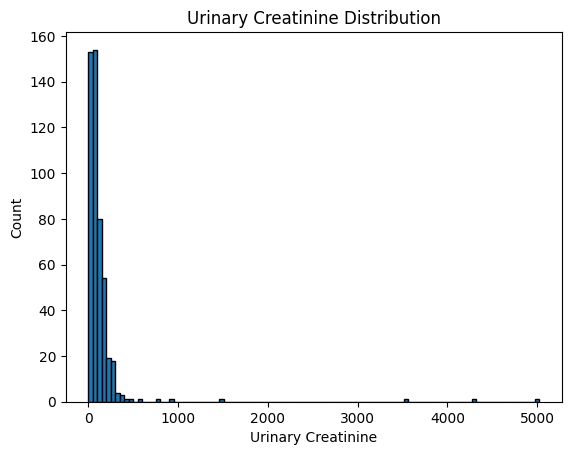

In [ ]:
plt.hist(df['Urinary Creatinine'], bins=100, edgecolor='k')
plt.xlabel('Urinary Creatinine')
plt.ylabel('Count')
plt.title('Urinary Creatinine Distribution')
plt.show()

**Quantitative UACR**

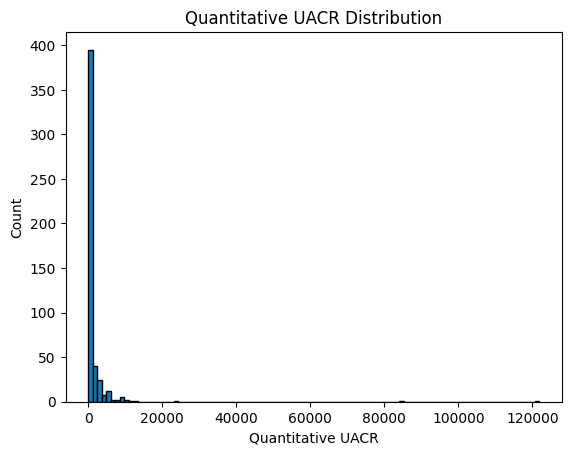

In [ ]:
plt.hist(df['Quantitative UACR'], bins=100, edgecolor='k')
plt.xlabel('Quantitative UACR')
plt.ylabel('Count')
plt.title('Quantitative UACR Distribution')
plt.show()

**Urinary Albumin**

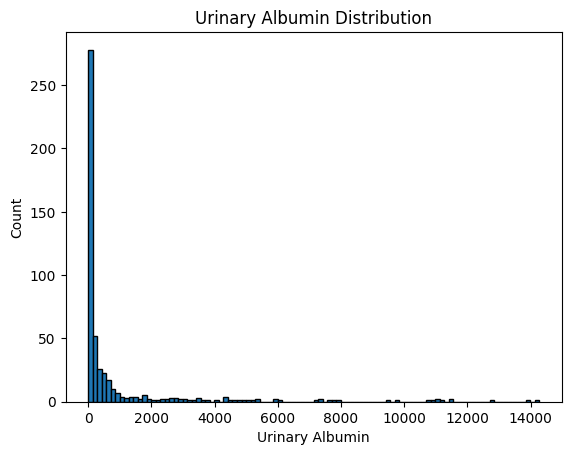

In [ ]:
plt.hist(df['Urinary Albumin'], bins=100, edgecolor='k')
plt.xlabel('Urinary Albumin')
plt.ylabel('Count')
plt.title('Urinary Albumin Distribution')
plt.show()

### **Nephropaty**

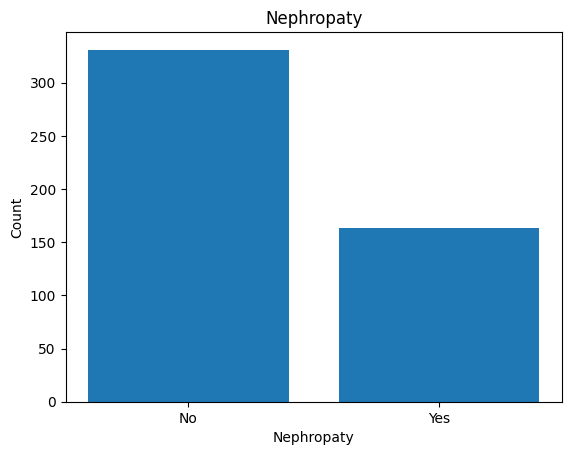

In [ ]:
df_neph = pd.DataFrame({'Urinary Albumin': df['Urinary Albumin']})
df_neph['Nephropaty'] = df_neph['Urinary Albumin'].apply(lambda x: 'Yes' if x > 300 else "No")
df_neph = df_neph['Nephropaty'].value_counts(ascending=False).reset_index()
df_neph.columns = ['Nephropaty', 'Count']

plt.bar(df_neph['Nephropaty'], df_neph['Count'])
plt.xlabel('Nephropaty')
plt.ylabel('Count')
plt.title('Nephropaty')
plt.show()

More patients who did not have nephropathy than those who did.

### **Correlation**

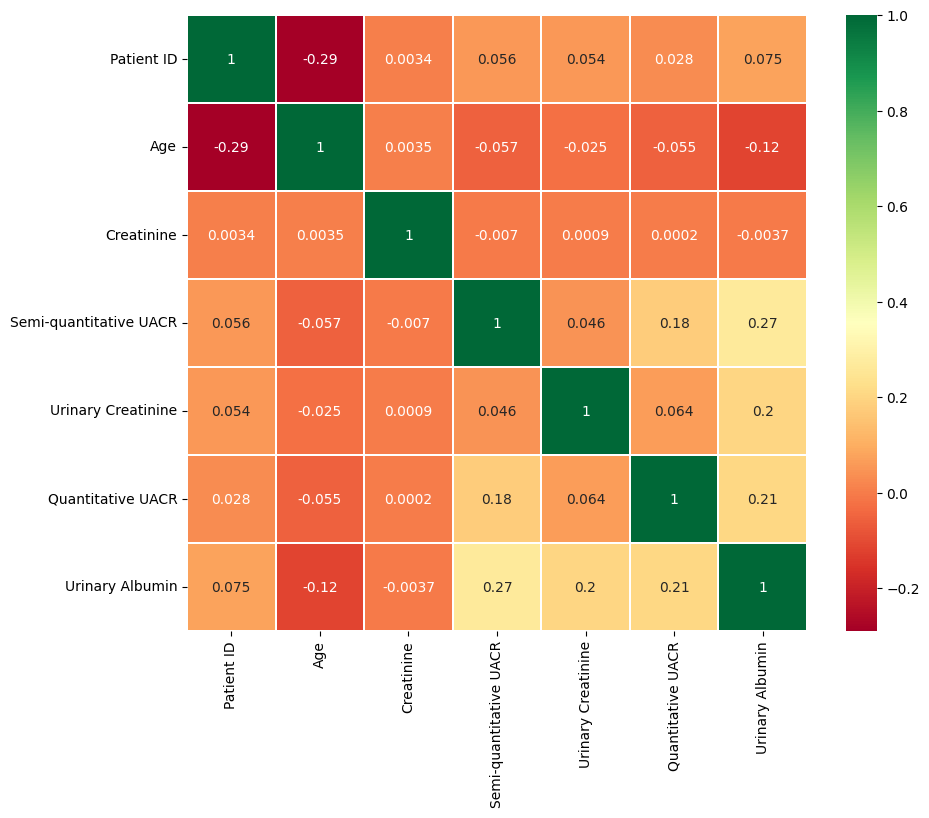

In [ ]:
sns.heatmap(df_input.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- The determinant of a patient being affected by nephropathy is when the Urinary Albumin or Quantitative UACR value is more than 300.
- Urinary Albumin and Semi-quantitative UACR are the most correlated features.
- The correlation between Urinary Creatinine or Quantitative UACR and Urinary Albumin is also high.

## **Modelling (Prediction)**

### **Split Dataset**

**Patient ID, Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine**

In [ ]:
X1 = df_input.drop(['Name', 'Urinary Albumin','Creatinine', 'Age'], axis=1)
y1 = df_input['Urinary Albumin']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=0)

**Age, Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine**

In [ ]:
X2 = df_input.drop(['Name', 'Urinary Albumin', 'Patient ID', 'Creatinine'], axis=1)
y2 = df_input['Urinary Albumin']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=0)

**Patient ID, Age, Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine**

In [ ]:
X3 = df_input.drop(['Name', 'Urinary Albumin', 'Creatinine'], axis=1)
y3 = df_input['Urinary Albumin']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=0)

**Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine**

In [ ]:
X4 = df_input.drop(['Name', 'Urinary Albumin', 'Age', 'Creatinine', 'Patient ID'], axis=1)
y4 = df_input['Urinary Albumin']

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=0)

**Quantitative UACR and Urinary Creatinine**

In [ ]:
X5 = df_input.drop(['Name', 'Urinary Albumin', 'Age', 'Creatinine', 'Patient ID', 'Semi-quantitative UACR'], axis=1)
y5 = df_input['Urinary Albumin']

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=0)

### **Modelling and Evaluation Function**

In [ ]:
def evaluation(y_test, y_pred):
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  return mae, mse, rmse

def rmse_cv(model, X, y):
  rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
  return rmse

def cal_mape(y_test, y_pred):
  y_test, y_pred = np.array(y_test), np.array(y_pred)
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) / 100
  return mape

In [ ]:
func = np.vectorize(lambda x: 'yes' if x > 300 else 'no')
test1 = func(y_test1)
test2 = func(y_test2)
test3 = func(y_test3)
test4 = func(y_test4)
test5 = func(y_test5)

In [ ]:
models1 = pd.DataFrame(columns=["Model", "Duration", "MAE", "MSE", "RMSE", "RMSE (Cross-Validation)", "MAPE", "Accuracy", "Accuracy (MAPE)"])
models2 = pd.DataFrame(columns=["Model", "Duration", "MAE", "MSE", "RMSE", "RMSE (Cross-Validation)", "MAPE", "Accuracy", "Accuracy (MAPE)"])
models3 = pd.DataFrame(columns=["Model", "Duration", "MAE", "MSE", "RMSE", "RMSE (Cross-Validation)", "MAPE", "Accuracy", "Accuracy (MAPE)"])
models4 = pd.DataFrame(columns=["Model", "Duration", "MAE", "MSE", "RMSE", "RMSE (Cross-Validation)", "MAPE", "Accuracy", "Accuracy (MAPE)"])
models5 = pd.DataFrame(columns=["Model", "Duration", "MAE", "MSE", "RMSE", "RMSE (Cross-Validation)", "MAPE", "Accuracy", "Accuracy (MAPE)"])

In [ ]:
stacking_models = pd.DataFrame(columns=["Model", "Duration", "MAE", "MSE", "RMSE", "RMSE (Cross-Validation)", "MAPE", "Accuracy", "Accuracy (MAPE)"])

### **Huber**

**Original**

MAE: 0.06603933365642761
MSE: 0.025684468869640424
RMSE: 0.16026374783350233
RMSE Cross-Validation: 0.15140091495536429
Accuracy: 1.0
MAPE: 0.09058561153343239
Accuracy (MAPE): 0.9094143884665676


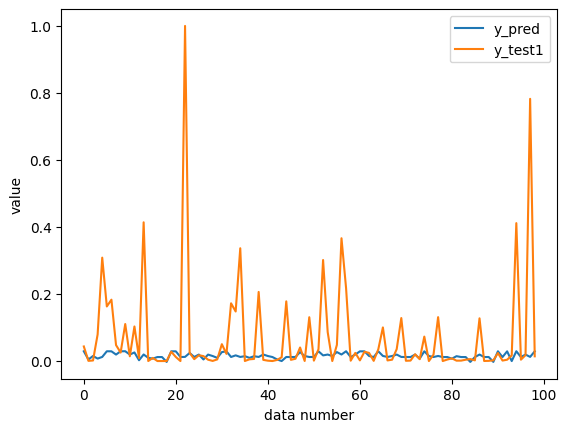

In [ ]:
start = time.time()
huber_ori = HuberRegressor()
huber_ori.fit(X_train1, y_train1)
y_pred = huber_ori.predict(X_test1)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test1, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(huber_ori, X1, y1)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test1, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test1, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

new_row = {"Model": "Huber", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
models1 = models1.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test1, label='y_test1')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 0.054075661863200536
MSE: 0.01962482160995817
RMSE: 0.14008862055840998
RMSE Cross-Validation: 0.22832162580824472
Accuracy: 1.0
MAPE: 0.049987885627960124
Accuracy (MAPE): 0.9500121143720399


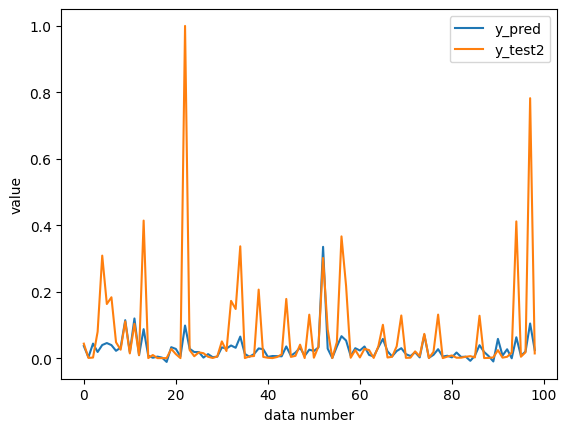

In [ ]:
start = time.time()
huber_ori = HuberRegressor()
huber_ori.fit(X_train2, y_train2)
y_pred = huber_ori.predict(X_test2)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test2, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(huber_ori, X2, y2)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test2, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test2, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

new_row = {"Model": "Huber", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
models2 = models2.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test2, label='y_test2')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

In [ ]:
y_test2

341    0.043706
96     0.000753
326    0.001833
245    0.079622
76     0.308663
         ...   
369    0.411629
56     0.004279
272    0.017737
60     0.782475
206    0.014260
Name: Urinary Albumin, Length: 99, dtype: float64

MAE: 0.06685768408090914
MSE: 0.026243365709373558
RMSE: 0.1619980423010524
RMSE Cross-Validation: 0.14739790313852513
Accuracy: 1.0
MAPE: 0.062078102221743474
Accuracy (MAPE): 0.9379218977782565


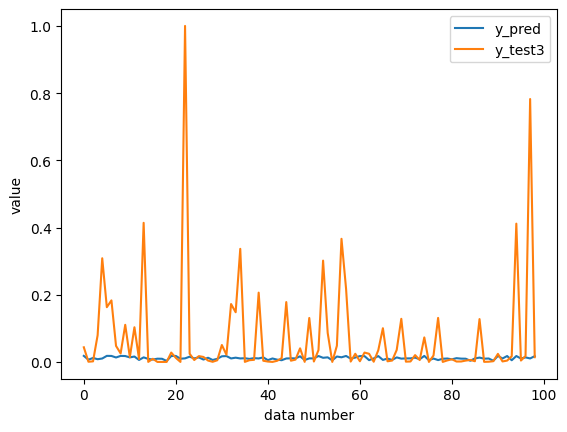

In [ ]:
start = time.time()
huber_ori = HuberRegressor()
huber_ori.fit(X_train3, y_train3)
y_pred = huber_ori.predict(X_test3)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test3, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(huber_ori, X3, y3)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test3, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test3, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

new_row = {"Model": "Huber", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
models3 = models3.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test3, label='y_test3')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 0.0541365589219255
MSE: 0.019633910004426863
RMSE: 0.14012105482198906
RMSE Cross-Validation: 0.22817806604952923
Accuracy: 1.0
MAPE: 0.054396756941838556
Accuracy (MAPE): 0.9456032430581615


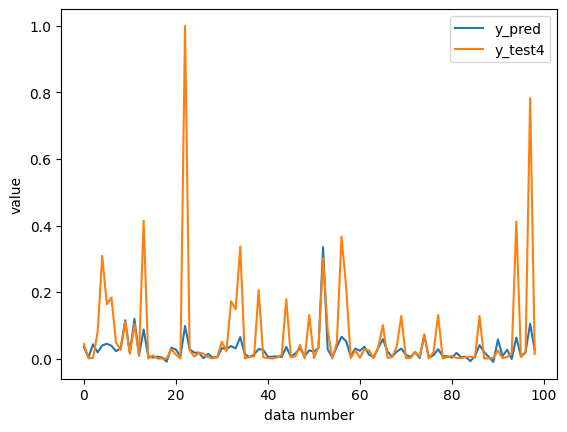

In [ ]:
start = time.time()
huber_ori = HuberRegressor()
huber_ori.fit(X_train4, y_train4)
y_pred = huber_ori.predict(X_test4)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test4, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(huber_ori, X4, y4)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test4, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test4, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

new_row = {"Model": "Huber", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
models4 = models4.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test4, label='y_test4')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 0.050566847362466326
MSE: 0.016365332653571627
RMSE: 0.1279270598957532
RMSE Cross-Validation: 0.22824918236033306
Accuracy: 1.0
MAPE: 0.04650058602972921
Accuracy (MAPE): 0.9534994139702708


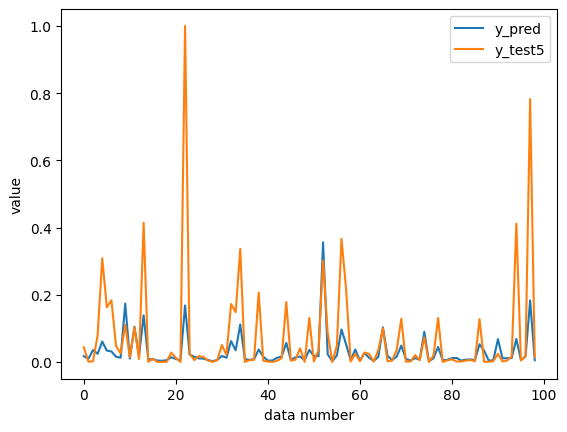

In [ ]:
start = time.time()
huber_ori = HuberRegressor()
huber_ori.fit(X_train5, y_train5)
y_pred = huber_ori.predict(X_test5)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test5, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(huber_ori, X5, y5)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test5, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test5, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

new_row = {"Model": "Huber", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
models5 = models5.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test5, label='y_test5')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

**Tuning**

In [ ]:
# start = time.time()
# huber = HuberRegressor(alpha=0.1, epsilon=1.0, max_iter=100)
# huber.fit(X_train1, y_train1)
# y_pred = huber.predict(X_test1)
# end = time.time()
# duration = end - start
# dur1 = duration

# mae, mse, rmse = evaluation(y_test1, y_pred)
# print("MAE:", mae)
# print("MSE:", mse)
# print("RMSE:", rmse)
# rmse_cross_val = rmse_cv(huber, X1, y1)
# print("RMSE Cross-Validation:", rmse_cross_val)
# pred = func(y_pred)
# acc = accuracy_score(test1, pred)
# print("Accuracy:", acc)

# index = np.arange(len(y_pred))
# plt.plot(index, y_pred, label='y_pred')
# plt.plot(index, y_test1, label='y_test1')
# plt.xlabel('data number')
# plt.ylabel('value')
# plt.legend()
# plt.show()

MAE: 0.05499082654650756
MSE: 0.02052430271115521
RMSE: 0.14326305424342736
RMSE Cross-Validation: 0.19625980877768354
Accuracy: 1.0
MAPE: 0.040307173174103886
Accuracy (MAPE): 0.9596928268258961


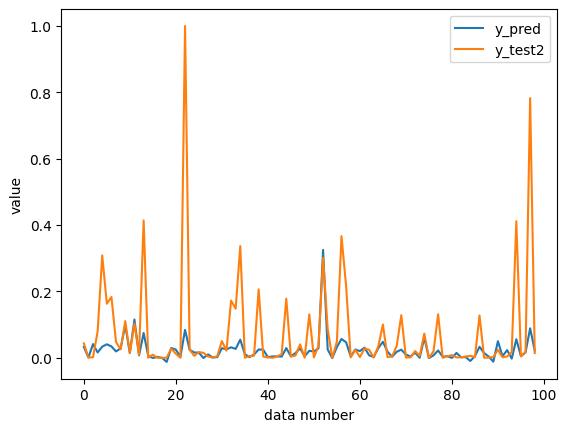

In [ ]:
start = time.time()
huber = HuberRegressor(alpha=0.1, epsilon=1.0, max_iter=100)
huber.fit(X_train2, y_train2)
y_pred = huber.predict(X_test2)
end = time.time()
duration = end - start
dur1 = duration

mae, mse, rmse = evaluation(y_test2, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(huber, X2, y2)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test2, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test2, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test2, label='y_test2')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 0.11887162050100006
MSE: 0.03276104283484474
RMSE: 0.1810001183282617
RMSE Cross-Validation: 0.15309008054993994
Accuracy: 1.0
MAPE: 0.5372971946808128
Accuracy (MAPE): 0.46270280531918717


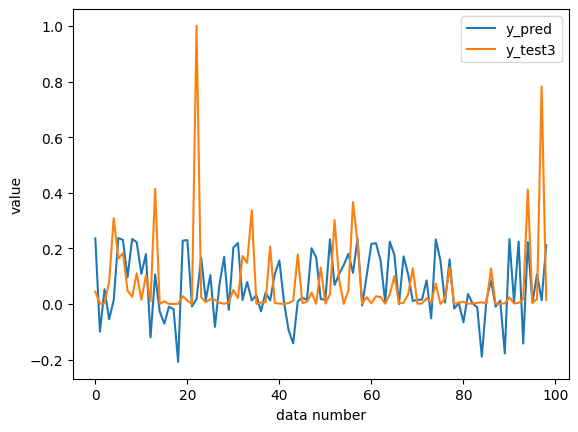

In [ ]:
start = time.time()
huber = HuberRegressor(alpha=0.1, epsilon=1.0, max_iter=100)
huber.fit(X_train3, y_train3)
y_pred = huber.predict(X_test3)
end = time.time()
duration = end - start
dur1 = duration

mae, mse, rmse = evaluation(y_test3, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(huber, X3, y3)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test3, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test3, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test3, label='y_test3')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 0.055018066475350645
MSE: 0.02055257916612081
RMSE: 0.14336170746095628
RMSE Cross-Validation: 0.19634673005390263
Accuracy: 1.0
MAPE: 0.040286406760349926
Accuracy (MAPE): 0.9597135932396501


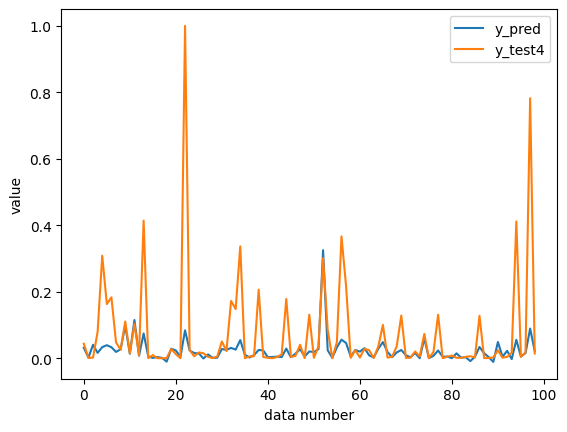

In [ ]:
start = time.time()
huber = HuberRegressor(alpha=0.1, epsilon=1.0, max_iter=100)
huber.fit(X_train4, y_train4)
y_pred = huber.predict(X_test4)
end = time.time()
duration = end - start
dur1 = duration

mae, mse, rmse = evaluation(y_test4, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(huber, X4, y4)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test4, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test4, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test4, label='y_test4')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 0.05147171854898174
MSE: 0.017346469443944548
RMSE: 0.13170599623382584
RMSE Cross-Validation: 0.20009772641741436
Accuracy: 1.0
MAPE: 0.03364252917342491
Accuracy (MAPE): 0.9663574708265751


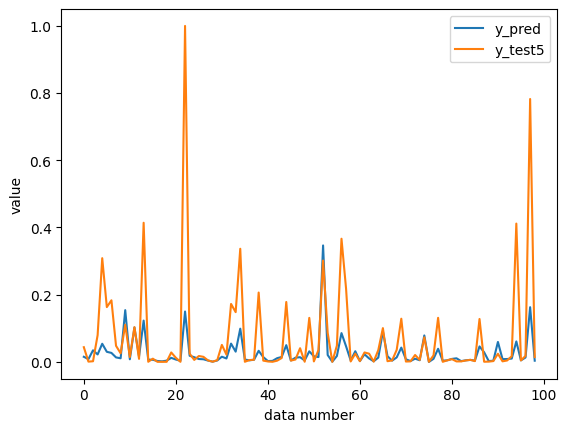

In [ ]:
start = time.time()
huber = HuberRegressor(alpha=0.1, epsilon=1.0, max_iter=100)
huber.fit(X_train5, y_train5)
y_pred = huber.predict(X_test5)
end = time.time()
duration = end - start
dur1 = duration

mae, mse, rmse = evaluation(y_test5, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(huber, X5, y5)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test5, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test5, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test5, label='y_test5')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

### **Random Forest**

**Original**

MAE: 0.02063076278083795
MSE: 0.003026676918220753
RMSE: 0.05501524259894482
RMSE Cross-Validation: 0.07147619236124067
Accuracy: 1.0
MAPE: 0.01986526701339488
Accuracy (MAPE): 0.9801347329866051


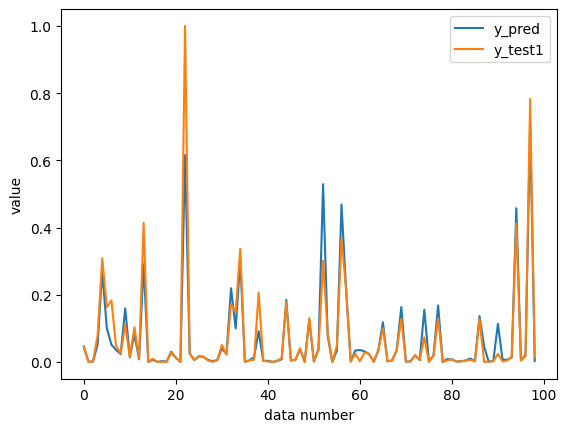

In [ ]:
start = time.time()
random_forest_ori = RandomForestRegressor(random_state=0)
random_forest_ori.fit(X_train1, y_train1)
y_pred = random_forest_ori.predict(X_test1)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test1, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(random_forest_ori, X1, y1)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test1, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test1, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

new_row = {"Model": "RandomForestRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
models1 = models1.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test1, label='y_test1')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 0.02068862744365045
MSE: 0.0024409646801470167
RMSE: 0.04940611986532657
RMSE Cross-Validation: 0.06916930601069259
Accuracy: 1.0
MAPE: 0.01867650020948198
Accuracy (MAPE): 0.981323499790518


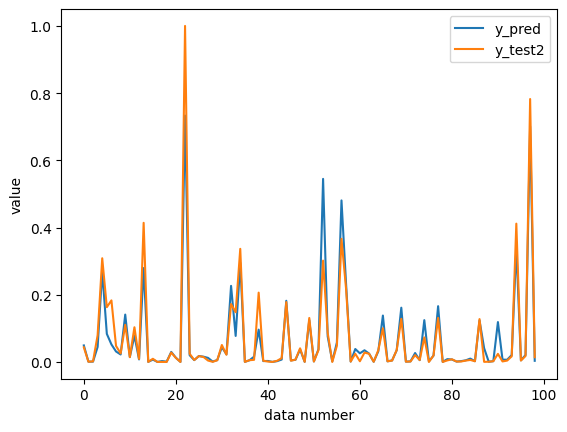

In [ ]:
start = time.time()
random_forest_ori = RandomForestRegressor(random_state=0)
random_forest_ori.fit(X_train2, y_train2)
y_pred = random_forest_ori.predict(X_test2)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test2, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(random_forest_ori, X2, y2)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test2, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test2, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

new_row = {"Model": "RandomForestRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
models2 = models2.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test2, label='y_test2')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 0.021911748089614966
MSE: 0.00282760751028513
RMSE: 0.05317525279944732
RMSE Cross-Validation: 0.07270509203218271
Accuracy: 1.0
MAPE: 0.021577513153013646
Accuracy (MAPE): 0.9784224868469864


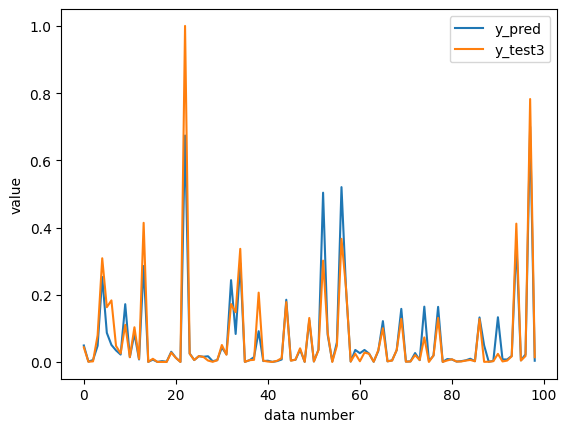

In [ ]:
start = time.time()
random_forest_ori = RandomForestRegressor(random_state=0)
random_forest_ori.fit(X_train3, y_train3)
y_pred = random_forest_ori.predict(X_test3)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test3, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(random_forest_ori, X3, y3)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test3, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test3, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

new_row = {"Model": "RandomForestRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
models3 = models3.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test3, label='y_test3')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 0.018880712344286992
MSE: 0.002113920095546355
RMSE: 0.04597738678466138
RMSE Cross-Validation: 0.0689662532621468
Accuracy: 1.0
MAPE: 0.016696169095304518
Accuracy (MAPE): 0.9833038309046955


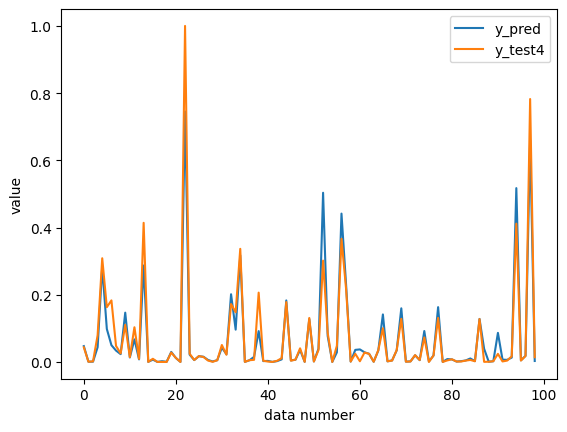

In [ ]:
start = time.time()
random_forest_ori = RandomForestRegressor(random_state=0)
random_forest_ori.fit(X_train4, y_train4)
y_pred = random_forest_ori.predict(X_test4)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test4, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(random_forest_ori, X4, y4)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test4, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test4, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

new_row = {"Model": "RandomForestRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
models4 = models4.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test4, label='y_test4')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 0.016131746749360295
MSE: 0.0015515351017617333
RMSE: 0.0393895303572121
RMSE Cross-Validation: 0.06813223792427078
Accuracy: 1.0
MAPE: 0.01607691431381556
Accuracy (MAPE): 0.9839230856861845


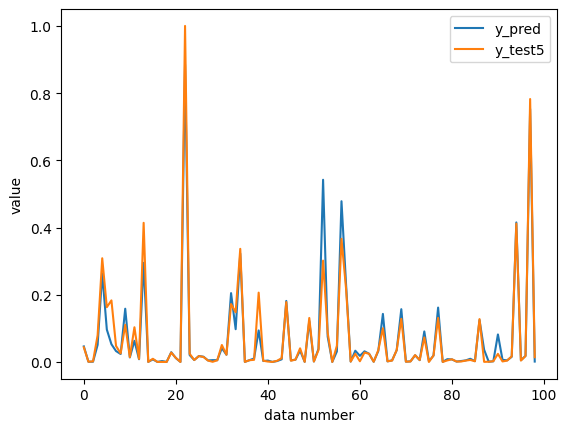

In [ ]:
start = time.time()
random_forest_ori = RandomForestRegressor(random_state=0)
random_forest_ori.fit(X_train5, y_train5)
y_pred = random_forest_ori.predict(X_test5)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test5, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(random_forest_ori, X5, y5)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test5, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test5, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

new_row = {"Model": "RandomForestRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
models5 = models5.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test5, label='y_test5')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

**Tuning**

MAE: 0.019786319086879448
MSE: 0.0027183923754286257
RMSE: 0.05213820456659997
RMSE Cross-Validation: 0.07208447673184715
Accuracy: 1.0
MAPE: 0.018506917411766743
Accuracy (MAPE): 0.9814930825882333


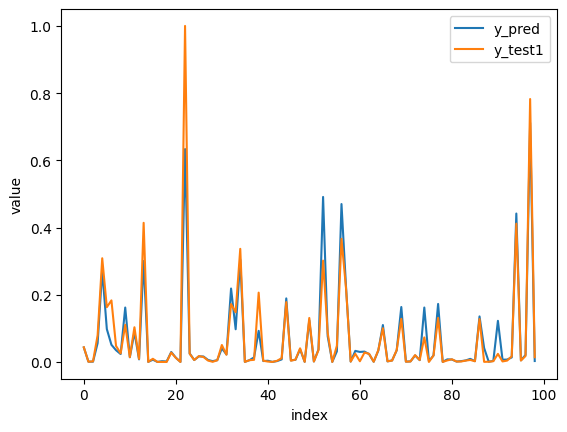

In [ ]:
start = time.time()
random_forest = RandomForestRegressor(random_state=0, n_estimators=200)
random_forest.fit(X_train1, y_train1)
y_pred = random_forest.predict(X_test1)
end = time.time()
duration = end - start
dur2 = duration

mae, mse, rmse = evaluation(y_test1, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(random_forest, X1, y1)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test1, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test1, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test1, label='y_test1')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 0.020591703880327508
MSE: 0.002350683128494656
RMSE: 0.048483843994620066
RMSE Cross-Validation: 0.06892272796182788
Accuracy: 1.0
MAPE: 0.018212759587687925
Accuracy (MAPE): 0.981787240412312


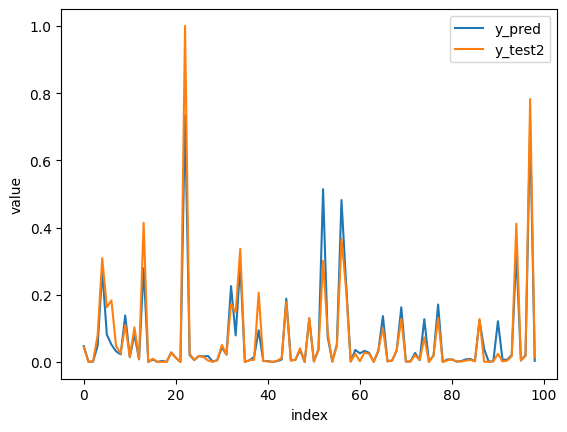

In [ ]:
start = time.time()
random_forest = RandomForestRegressor(random_state=0, n_estimators=200)
random_forest.fit(X_train2, y_train2)
y_pred = random_forest.predict(X_test2)
end = time.time()
duration = end - start
dur2 = duration

mae, mse, rmse = evaluation(y_test2, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(random_forest, X2, y2)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test2, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test2, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test2, label='y_test2')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 0.020974554702514962
MSE: 0.0026181574447384057
RMSE: 0.05116793375482741
RMSE Cross-Validation: 0.0723812271205444
Accuracy: 1.0
MAPE: 0.020813630528010277
Accuracy (MAPE): 0.9791863694719897


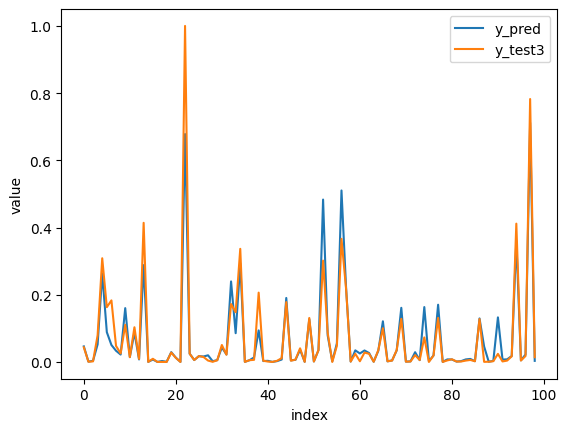

In [ ]:
start = time.time()
random_forest = RandomForestRegressor(random_state=0, n_estimators=200)
random_forest.fit(X_train3, y_train3)
y_pred = random_forest.predict(X_test3)
end = time.time()
duration = end - start
dur2 = duration

mae, mse, rmse = evaluation(y_test3, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(random_forest, X3, y3)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test3, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test3, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test3, label='y_test3')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 0.0182424740506202
MSE: 0.001894505303348192
RMSE: 0.043525915307414176
RMSE Cross-Validation: 0.0688521189982953
Accuracy: 1.0
MAPE: 0.015930983782700178
Accuracy (MAPE): 0.9840690162172998


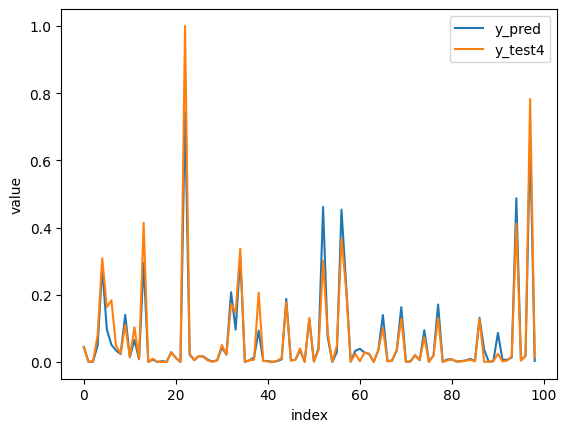

In [ ]:
start = time.time()
random_forest = RandomForestRegressor(random_state=0, n_estimators=200)
random_forest.fit(X_train4, y_train4)
y_pred = random_forest.predict(X_test4)
end = time.time()
duration = end - start
dur2 = duration

mae, mse, rmse = evaluation(y_test4, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(random_forest, X4, y4)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test4, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test4, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test4, label='y_test4')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

MAE: 0.01567866739747008
MSE: 0.0013813826477392893
RMSE: 0.037166956395961306
RMSE Cross-Validation: 0.067525012483913
Accuracy: 1.0
MAPE: 0.01560905046751798
Accuracy (MAPE): 0.9843909495324821


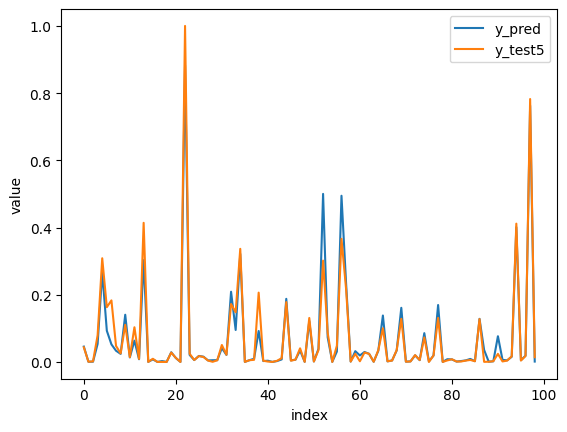

In [ ]:
start = time.time()
random_forest = RandomForestRegressor(random_state=0, n_estimators=200)
random_forest.fit(X_train5, y_train5)
y_pred = random_forest.predict(X_test5)
end = time.time()
duration = end - start
dur2 = duration

mae, mse, rmse = evaluation(y_test5, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(random_forest, X5, y5)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test5, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test5, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test5, label='y_test5')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

### **CatBoost**

**Original**

Streaming output truncated to the last 5000 lines.
8:	learn: 0.1275882	total: 12.3ms	remaining: 1.35s
9:	learn: 0.1254226	total: 13.5ms	remaining: 1.33s
10:	learn: 0.1232651	total: 14.8ms	remaining: 1.33s
11:	learn: 0.1210425	total: 16.1ms	remaining: 1.32s
12:	learn: 0.1189285	total: 19.3ms	remaining: 1.46s
13:	learn: 0.1168951	total: 20.8ms	remaining: 1.47s
14:	learn: 0.1151801	total: 22.2ms	remaining: 1.46s
15:	learn: 0.1132711	total: 23.5ms	remaining: 1.45s
16:	learn: 0.1113648	total: 24.7ms	remaining: 1.43s
17:	learn: 0.1094478	total: 25.8ms	remaining: 1.41s
18:	learn: 0.1078112	total: 27.1ms	remaining: 1.4s
19:	learn: 0.1060645	total: 28.4ms	remaining: 1.39s
20:	learn: 0.1044363	total: 29.7ms	remaining: 1.39s
21:	learn: 0.1028492	total: 31ms	remaining: 1.38s
22:	learn: 0.1011607	total: 32.2ms	remaining: 1.37s
23:	learn: 0.0996995	total: 33.5ms	remaining: 1.36s
24:	learn: 0.0982353	total: 34.7ms	remaining: 1.35s
25:	learn: 0.0968539	total: 35.9ms	remaining: 1.34s
26:	learn: 0.09556

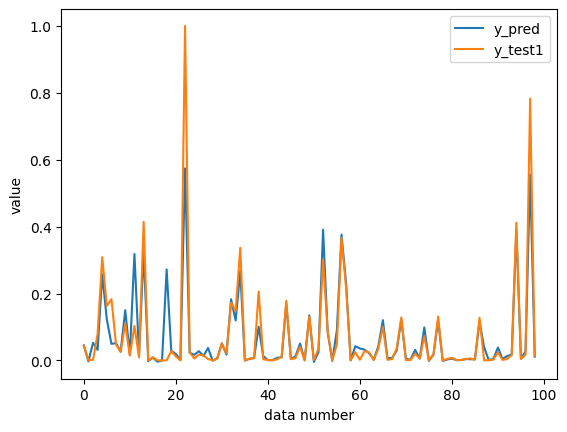

In [ ]:
start = time.time()
catboost_ori = CatBoostRegressor()
catboost_ori.fit(X_train1, y_train1)
y_pred = catboost_ori.predict(X_test1)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test1, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(catboost_ori, X1, y1)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test1, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test1, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

new_row = {"Model": "CatBoostRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
models1 = models1.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test1, label='y_test1')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
8:	learn: 0.1279822	total: 17.5ms	remaining: 1.92s
9:	learn: 0.1257558	total: 18.9ms	remaining: 1.87s
10:	learn: 0.1237327	total: 21.2ms	remaining: 1.9s
11:	learn: 0.1215510	total: 23.2ms	remaining: 1.91s
12:	learn: 0.1195765	total: 25.3ms	remaining: 1.92s
13:	learn: 0.1172692	total: 27.4ms	remaining: 1.93s
14:	learn: 0.1150694	total: 29.6ms	remaining: 1.94s
15:	learn: 0.1130500	total: 31.7ms	remaining: 1.95s
16:	learn: 0.1115821	total: 33.9ms	remaining: 1.96s
17:	learn: 0.1098632	total: 36ms	remaining: 1.97s
18:	learn: 0.1082331	total: 38.3ms	remaining: 1.98s
19:	learn: 0.1064707	total: 40.3ms	remaining: 1.98s
20:	learn: 0.1045381	total: 42.4ms	remaining: 1.98s
21:	learn: 0.1029319	total: 44.7ms	remaining: 1.99s
22:	learn: 0.1012862	total: 47.4ms	remaining: 2.02s
23:	learn: 0.0995283	total: 57.4ms	remaining: 2.33s
24:	learn: 0.0980760	total: 59.6ms	remaining: 2.32s
25:	learn: 0.0967246	total: 63.1ms	remaining: 2.36s
26:	learn: 0.09552

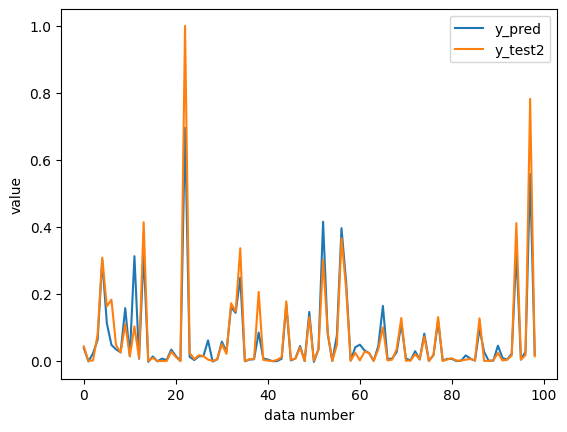

In [ ]:
start = time.time()
catboost_ori = CatBoostRegressor()
catboost_ori.fit(X_train2, y_train2)
y_pred = catboost_ori.predict(X_test2)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test2, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(catboost_ori, X2, y2)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test2, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test2, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

new_row = {"Model": "CatBoostRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
models2 = models2.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test2, label='y_test2')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
8:	learn: 0.1271985	total: 18.6ms	remaining: 2.05s
9:	learn: 0.1250062	total: 20.8ms	remaining: 2.06s
10:	learn: 0.1228088	total: 22.2ms	remaining: 2s
11:	learn: 0.1209692	total: 23.7ms	remaining: 1.95s
12:	learn: 0.1191849	total: 25.1ms	remaining: 1.91s
13:	learn: 0.1171455	total: 26.5ms	remaining: 1.86s
14:	learn: 0.1155016	total: 27.9ms	remaining: 1.83s
15:	learn: 0.1136123	total: 29.3ms	remaining: 1.8s
16:	learn: 0.1117593	total: 30.7ms	remaining: 1.77s
17:	learn: 0.1099516	total: 32ms	remaining: 1.75s
18:	learn: 0.1082004	total: 33.4ms	remaining: 1.73s
19:	learn: 0.1066247	total: 34.7ms	remaining: 1.7s
20:	learn: 0.1049583	total: 36.1ms	remaining: 1.68s
21:	learn: 0.1032680	total: 37.3ms	remaining: 1.66s
22:	learn: 0.1017286	total: 38.6ms	remaining: 1.64s
23:	learn: 0.1002100	total: 40ms	remaining: 1.63s
24:	learn: 0.0987594	total: 41.2ms	remaining: 1.61s
25:	learn: 0.0973373	total: 42.4ms	remaining: 1.59s
26:	learn: 0.0961427	tot

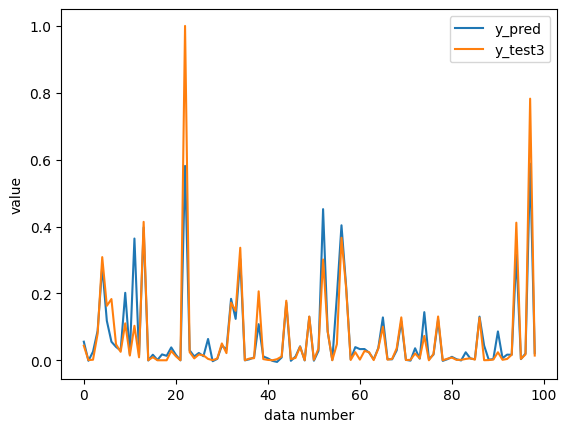

In [ ]:
start = time.time()
catboost_ori = CatBoostRegressor()
catboost_ori.fit(X_train3, y_train3)
y_pred = catboost_ori.predict(X_test3)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test3, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(catboost_ori, X3, y3)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test3, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test3, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

new_row = {"Model": "CatBoostRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
models3 = models3.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test3, label='y_test3')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
8:	learn: 0.1266968	total: 10.1ms	remaining: 1.11s
9:	learn: 0.1242511	total: 11ms	remaining: 1.09s
10:	learn: 0.1221572	total: 11.9ms	remaining: 1.07s
11:	learn: 0.1196986	total: 12.8ms	remaining: 1.06s
12:	learn: 0.1177530	total: 13.8ms	remaining: 1.04s
13:	learn: 0.1156903	total: 14.7ms	remaining: 1.03s
14:	learn: 0.1138752	total: 15.6ms	remaining: 1.02s
15:	learn: 0.1120715	total: 16.6ms	remaining: 1.02s
16:	learn: 0.1101060	total: 17.5ms	remaining: 1.01s
17:	learn: 0.1081847	total: 18.4ms	remaining: 1s
18:	learn: 0.1064411	total: 19.3ms	remaining: 999ms
19:	learn: 0.1047754	total: 20.3ms	remaining: 995ms
20:	learn: 0.1029826	total: 21.2ms	remaining: 988ms
21:	learn: 0.1013348	total: 23.5ms	remaining: 1.04s
22:	learn: 0.0997056	total: 28.7ms	remaining: 1.22s
23:	learn: 0.0978623	total: 29.9ms	remaining: 1.21s
24:	learn: 0.0963234	total: 33ms	remaining: 1.28s
25:	learn: 0.0948362	total: 34.1ms	remaining: 1.28s
26:	learn: 0.0935752	t

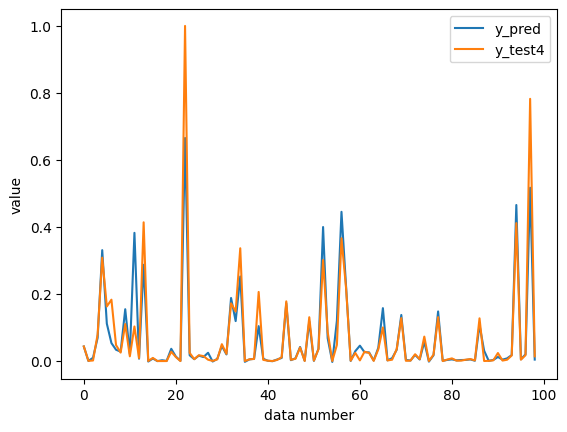

In [ ]:
start = time.time()
catboost_ori = CatBoostRegressor()
catboost_ori.fit(X_train4, y_train4)
y_pred = catboost_ori.predict(X_test4)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test4, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(catboost_ori, X4, y4)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test4, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test4, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

new_row = {"Model": "CatBoostRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
models4 = models4.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test4, label='y_test4')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
8:	learn: 0.1255350	total: 18.5ms	remaining: 2.03s
9:	learn: 0.1233251	total: 19.9ms	remaining: 1.97s
10:	learn: 0.1211966	total: 21ms	remaining: 1.89s
11:	learn: 0.1189300	total: 22ms	remaining: 1.81s
12:	learn: 0.1168109	total: 23ms	remaining: 1.74s
13:	learn: 0.1146765	total: 23.9ms	remaining: 1.69s
14:	learn: 0.1124029	total: 24.6ms	remaining: 1.61s
15:	learn: 0.1102034	total: 25.2ms	remaining: 1.55s
16:	learn: 0.1085054	total: 26.3ms	remaining: 1.52s
17:	learn: 0.1069029	total: 27.5ms	remaining: 1.5s
18:	learn: 0.1052588	total: 28.6ms	remaining: 1.48s
19:	learn: 0.1033115	total: 29.4ms	remaining: 1.44s
20:	learn: 0.1015801	total: 30.3ms	remaining: 1.41s
21:	learn: 0.0998768	total: 31.5ms	remaining: 1.4s
22:	learn: 0.0980796	total: 32.5ms	remaining: 1.38s
23:	learn: 0.0967384	total: 33.5ms	remaining: 1.36s
24:	learn: 0.0955105	total: 34.1ms	remaining: 1.33s
25:	learn: 0.0941606	total: 34.9ms	remaining: 1.31s
26:	learn: 0.0926000	to

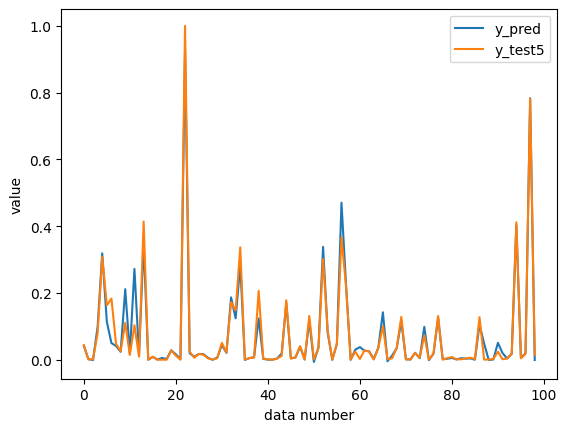

In [ ]:
start = time.time()
catboost_ori = CatBoostRegressor()
catboost_ori.fit(X_train5, y_train5)
y_pred = catboost_ori.predict(X_test5)
end = time.time()
duration = end - start

mae, mse, rmse = evaluation(y_test5, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(catboost_ori, X5, y5)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test5, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test5, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

new_row = {"Model": "CatBoostRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
models5 = models5.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test5, label='y_test5')
plt.xlabel('data number')
plt.ylabel('value')
plt.legend()
plt.show()

**Tuning**

Streaming output truncated to the last 5000 lines.
4:	learn: 0.1464707	total: 8.49ms	remaining: 1.69s
5:	learn: 0.1456974	total: 9.25ms	remaining: 1.53s
6:	learn: 0.1448314	total: 9.98ms	remaining: 1.42s
7:	learn: 0.1441182	total: 10.7ms	remaining: 1.33s
8:	learn: 0.1433797	total: 11.4ms	remaining: 1.26s
9:	learn: 0.1425856	total: 12.1ms	remaining: 1.2s
10:	learn: 0.1418865	total: 12.8ms	remaining: 1.15s
11:	learn: 0.1411535	total: 13.8ms	remaining: 1.14s
12:	learn: 0.1403211	total: 14.6ms	remaining: 1.11s
13:	learn: 0.1395755	total: 15.3ms	remaining: 1.08s
14:	learn: 0.1388363	total: 16ms	remaining: 1.05s
15:	learn: 0.1381022	total: 16.7ms	remaining: 1.03s
16:	learn: 0.1372586	total: 17.4ms	remaining: 1s
17:	learn: 0.1365573	total: 18.1ms	remaining: 986ms
18:	learn: 0.1357746	total: 18.7ms	remaining: 968ms
19:	learn: 0.1350771	total: 19.4ms	remaining: 952ms
20:	learn: 0.1342997	total: 20.1ms	remaining: 938ms
21:	learn: 0.1336545	total: 20.9ms	remaining: 928ms
22:	learn: 0.1330714	tota

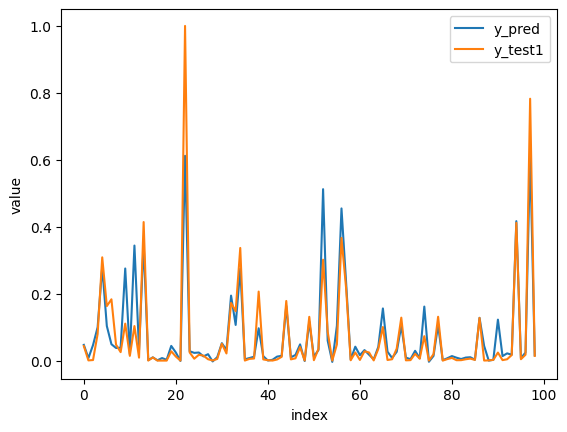

In [ ]:
start = time.time()
catboost = CatBoostRegressor(depth=4, iterations=1000, learning_rate=0.01)
catboost.fit(X_train1, y_train1)
y_pred = catboost.predict(X_test1)
end = time.time()
duration = end - start
dur3 = duration

mae, mse, rmse = evaluation(y_test1, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(catboost, X1, y1)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test1, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test1, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test1, label='y_test1')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
4:	learn: 0.1464807	total: 7.11ms	remaining: 1.42s
5:	learn: 0.1457080	total: 7.75ms	remaining: 1.28s
6:	learn: 0.1448845	total: 8.34ms	remaining: 1.18s
7:	learn: 0.1441673	total: 8.72ms	remaining: 1.08s
8:	learn: 0.1434286	total: 9.11ms	remaining: 1s
9:	learn: 0.1426335	total: 9.49ms	remaining: 940ms
10:	learn: 0.1419334	total: 10.4ms	remaining: 935ms
11:	learn: 0.1411956	total: 10.8ms	remaining: 890ms
12:	learn: 0.1403624	total: 11.2ms	remaining: 851ms
13:	learn: 0.1395581	total: 11.6ms	remaining: 820ms
14:	learn: 0.1388434	total: 12.1ms	remaining: 795ms
15:	learn: 0.1381089	total: 12.7ms	remaining: 782ms
16:	learn: 0.1372658	total: 13.3ms	remaining: 770ms
17:	learn: 0.1365635	total: 13.6ms	remaining: 744ms
18:	learn: 0.1357805	total: 14.3ms	remaining: 736ms
19:	learn: 0.1351172	total: 14.9ms	remaining: 729ms
20:	learn: 0.1343395	total: 15.5ms	remaining: 722ms
21:	learn: 0.1336790	total: 16.2ms	remaining: 721ms
22:	learn: 0.1330981	t

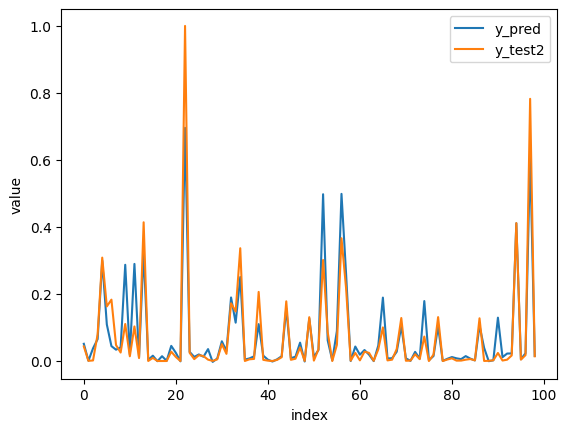

In [ ]:
start = time.time()
catboost = CatBoostRegressor(depth=4, iterations=1000, learning_rate=0.01)
catboost.fit(X_train2, y_train2)
y_pred = catboost.predict(X_test2)
end = time.time()
duration = end - start
dur3 = duration

mae, mse, rmse = evaluation(y_test1, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(catboost, X2, y2)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test2, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test2, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test2, label='y_test2')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
4:	learn: 0.1463307	total: 9.34ms	remaining: 1.86s
5:	learn: 0.1455434	total: 10.8ms	remaining: 1.79s
6:	learn: 0.1447592	total: 16.7ms	remaining: 2.37s
7:	learn: 0.1439710	total: 18.1ms	remaining: 2.24s
8:	learn: 0.1433563	total: 19.4ms	remaining: 2.13s
9:	learn: 0.1426700	total: 20.8ms	remaining: 2.06s
10:	learn: 0.1418515	total: 22.2ms	remaining: 1.99s
11:	learn: 0.1410618	total: 28.4ms	remaining: 2.34s
12:	learn: 0.1403017	total: 29.7ms	remaining: 2.25s
13:	learn: 0.1394242	total: 31.1ms	remaining: 2.19s
14:	learn: 0.1386075	total: 32.4ms	remaining: 2.13s
15:	learn: 0.1378906	total: 33.8ms	remaining: 2.08s
16:	learn: 0.1370732	total: 35.1ms	remaining: 2.03s
17:	learn: 0.1362389	total: 38.7ms	remaining: 2.11s
18:	learn: 0.1356423	total: 40.1ms	remaining: 2.07s
19:	learn: 0.1348414	total: 41.3ms	remaining: 2.02s
20:	learn: 0.1341817	total: 49.3ms	remaining: 2.3s
21:	learn: 0.1335893	total: 50.4ms	remaining: 2.24s
22:	learn: 0.1330065

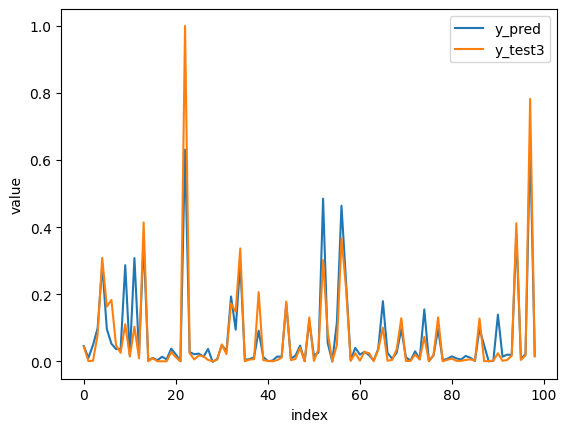

In [ ]:
start = time.time()
catboost = CatBoostRegressor(depth=4, iterations=1000, learning_rate=0.01)
catboost.fit(X_train3, y_train3)
y_pred = catboost.predict(X_test3)
end = time.time()
duration = end - start
dur3 = duration

mae, mse, rmse = evaluation(y_test3, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(catboost, X3, y3)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test3, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test3, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test3, label='y_test3')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
4:	learn: 0.1463163	total: 5.91ms	remaining: 1.18s
5:	learn: 0.1454794	total: 6.7ms	remaining: 1.11s
6:	learn: 0.1448085	total: 7.55ms	remaining: 1.07s
7:	learn: 0.1439796	total: 8.45ms	remaining: 1.05s
8:	learn: 0.1431788	total: 9.09ms	remaining: 1s
9:	learn: 0.1423956	total: 10ms	remaining: 990ms
10:	learn: 0.1416107	total: 10.7ms	remaining: 962ms
11:	learn: 0.1408390	total: 11.5ms	remaining: 945ms
12:	learn: 0.1400982	total: 12.3ms	remaining: 935ms
13:	learn: 0.1393022	total: 13.2ms	remaining: 933ms
14:	learn: 0.1385730	total: 13.9ms	remaining: 911ms
15:	learn: 0.1378485	total: 14.8ms	remaining: 909ms
16:	learn: 0.1370705	total: 15.5ms	remaining: 894ms
17:	learn: 0.1363631	total: 16.2ms	remaining: 886ms
18:	learn: 0.1356041	total: 17.1ms	remaining: 885ms
19:	learn: 0.1348272	total: 17.7ms	remaining: 868ms
20:	learn: 0.1340295	total: 18.6ms	remaining: 869ms
21:	learn: 0.1333778	total: 19.3ms	remaining: 857ms
22:	learn: 0.1327528	tota

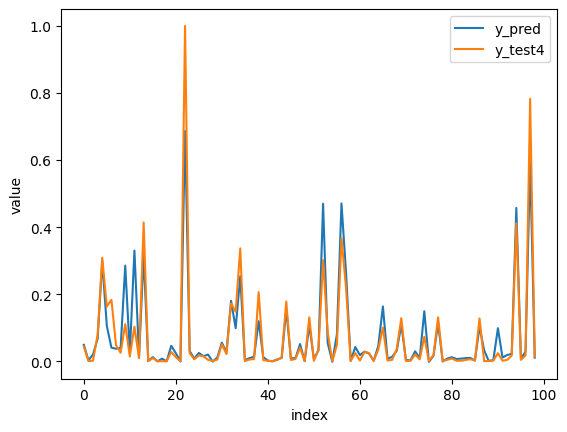

In [ ]:
start = time.time()
catboost = CatBoostRegressor(depth=4, iterations=1000, learning_rate=0.01)
catboost.fit(X_train4, y_train4)
y_pred = catboost.predict(X_test4)
end = time.time()
duration = end - start
dur3 = duration

mae, mse, rmse = evaluation(y_test4, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(catboost, X4, y4)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test4, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test4, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test4, label='y_test4')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
4:	learn: 0.1462001	total: 3.53ms	remaining: 703ms
5:	learn: 0.1452822	total: 3.84ms	remaining: 636ms
6:	learn: 0.1443771	total: 4.41ms	remaining: 625ms
7:	learn: 0.1434600	total: 4.98ms	remaining: 617ms
8:	learn: 0.1426753	total: 5.52ms	remaining: 608ms
9:	learn: 0.1418182	total: 6.07ms	remaining: 601ms
10:	learn: 0.1409732	total: 6.62ms	remaining: 595ms
11:	learn: 0.1401490	total: 7.16ms	remaining: 589ms
12:	learn: 0.1394049	total: 7.65ms	remaining: 581ms
13:	learn: 0.1385458	total: 8.22ms	remaining: 579ms
14:	learn: 0.1377667	total: 8.76ms	remaining: 575ms
15:	learn: 0.1369582	total: 9.29ms	remaining: 572ms
16:	learn: 0.1362059	total: 9.88ms	remaining: 572ms
17:	learn: 0.1354543	total: 10.4ms	remaining: 569ms
18:	learn: 0.1347256	total: 11ms	remaining: 567ms
19:	learn: 0.1340039	total: 11.5ms	remaining: 565ms
20:	learn: 0.1332200	total: 12.1ms	remaining: 563ms
21:	learn: 0.1324075	total: 12.6ms	remaining: 561ms
22:	learn: 0.1316562	

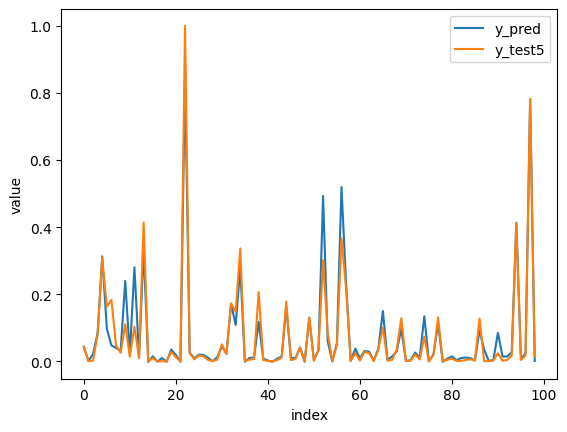

In [ ]:
start = time.time()
catboost = CatBoostRegressor(depth=4, iterations=1000, learning_rate=0.01)
catboost.fit(X_train5, y_train5)
y_pred = catboost.predict(X_test5)
end = time.time()
duration = end - start
dur3 = duration

mae, mse, rmse = evaluation(y_test5, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(catboost, X5, y5)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test5, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test5, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test5, label='y_test5')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

### **Stacking Regression**
- Regressors = CatBoost and Random Forest
- Meta Regressor = Huber

Streaming output truncated to the last 5000 lines.
4:	learn: 0.1464707	total: 4.37ms	remaining: 869ms
5:	learn: 0.1456974	total: 5.09ms	remaining: 844ms
6:	learn: 0.1448314	total: 5.75ms	remaining: 815ms
7:	learn: 0.1441182	total: 6.45ms	remaining: 800ms
8:	learn: 0.1433797	total: 7.17ms	remaining: 789ms
9:	learn: 0.1425856	total: 7.85ms	remaining: 777ms
10:	learn: 0.1418865	total: 8.53ms	remaining: 767ms
11:	learn: 0.1411535	total: 9.17ms	remaining: 755ms
12:	learn: 0.1403211	total: 9.9ms	remaining: 752ms
13:	learn: 0.1395755	total: 10.7ms	remaining: 751ms
14:	learn: 0.1388363	total: 11.4ms	remaining: 746ms
15:	learn: 0.1381022	total: 12ms	remaining: 738ms
16:	learn: 0.1372586	total: 12.7ms	remaining: 733ms
17:	learn: 0.1365573	total: 13.4ms	remaining: 729ms
18:	learn: 0.1357746	total: 14.1ms	remaining: 726ms
19:	learn: 0.1350771	total: 14.8ms	remaining: 725ms
20:	learn: 0.1342997	total: 15.5ms	remaining: 725ms
21:	learn: 0.1336545	total: 16.2ms	remaining: 721ms
22:	learn: 0.1330714	t

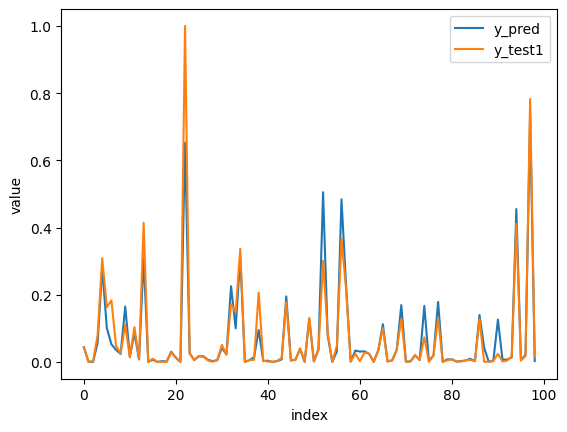

In [ ]:
start = time.time()
stacking = StackingRegressor(regressors=[catboost, random_forest], meta_regressor=huber)
stacking.fit(X_train1, y_train1)
y_pred = stacking.predict(X_test1)
end = time.time()
duration = end - start
duration = duration + dur1 + dur2 + dur3

mae, mse, rmse = evaluation(y_test1, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(stacking, X1, y1)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test1, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test1, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

new_row = {"Model": "StackingRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
models1 = models1.append(new_row, ignore_index=True)
new_row = {"Model": "StackingRegressor (1)", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
stacking_models = stacking_models.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test1, label='y_test1')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
4:	learn: 0.1464807	total: 4.58ms	remaining: 911ms
5:	learn: 0.1457080	total: 5.58ms	remaining: 924ms
6:	learn: 0.1448845	total: 6.53ms	remaining: 926ms
7:	learn: 0.1441673	total: 7.18ms	remaining: 891ms
8:	learn: 0.1434286	total: 8.03ms	remaining: 884ms
9:	learn: 0.1426335	total: 8.64ms	remaining: 856ms
10:	learn: 0.1419334	total: 9.27ms	remaining: 834ms
11:	learn: 0.1411956	total: 9.86ms	remaining: 812ms
12:	learn: 0.1403624	total: 10.5ms	remaining: 798ms
13:	learn: 0.1395581	total: 11.2ms	remaining: 792ms
14:	learn: 0.1388434	total: 11.9ms	remaining: 783ms
15:	learn: 0.1381089	total: 12.6ms	remaining: 777ms
16:	learn: 0.1372658	total: 13.4ms	remaining: 772ms
17:	learn: 0.1365635	total: 14.1ms	remaining: 767ms
18:	learn: 0.1357805	total: 14.7ms	remaining: 760ms
19:	learn: 0.1351172	total: 15.4ms	remaining: 753ms
20:	learn: 0.1343395	total: 16ms	remaining: 748ms
21:	learn: 0.1336790	total: 16.6ms	remaining: 739ms
22:	learn: 0.1330981	

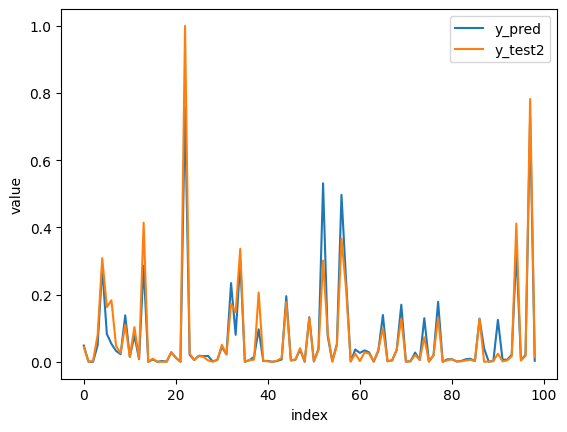

In [ ]:
start = time.time()
stacking = StackingRegressor(regressors=[catboost, random_forest], meta_regressor=huber)
stacking.fit(X_train2, y_train2)
y_pred = stacking.predict(X_test2)
end = time.time()
duration = end - start
duration = duration + dur1 + dur2 + dur3

mae, mse, rmse = evaluation(y_test2, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(stacking, X2, y2)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test2, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test2, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

new_row = {"Model": "StackingRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
models2 = models2.append(new_row, ignore_index=True)
new_row = {"Model": "StackingRegressor (2)", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
stacking_models = stacking_models.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test2, label='y_test2')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
4:	learn: 0.1463307	total: 3.18ms	remaining: 633ms
5:	learn: 0.1455434	total: 3.76ms	remaining: 623ms
6:	learn: 0.1447592	total: 4.29ms	remaining: 609ms
7:	learn: 0.1439710	total: 4.85ms	remaining: 602ms
8:	learn: 0.1433563	total: 5.62ms	remaining: 618ms
9:	learn: 0.1426700	total: 6.41ms	remaining: 634ms
10:	learn: 0.1418515	total: 7.2ms	remaining: 648ms
11:	learn: 0.1410618	total: 7.97ms	remaining: 657ms
12:	learn: 0.1403017	total: 8.72ms	remaining: 662ms
13:	learn: 0.1394242	total: 9.45ms	remaining: 666ms
14:	learn: 0.1386075	total: 10.2ms	remaining: 670ms
15:	learn: 0.1378906	total: 13.2ms	remaining: 811ms
16:	learn: 0.1370732	total: 13.9ms	remaining: 806ms
17:	learn: 0.1362389	total: 14.7ms	remaining: 805ms
18:	learn: 0.1356423	total: 15.5ms	remaining: 801ms
19:	learn: 0.1348414	total: 16.3ms	remaining: 798ms
20:	learn: 0.1341817	total: 17.1ms	remaining: 799ms
21:	learn: 0.1335893	total: 17.7ms	remaining: 786ms
22:	learn: 0.1330065

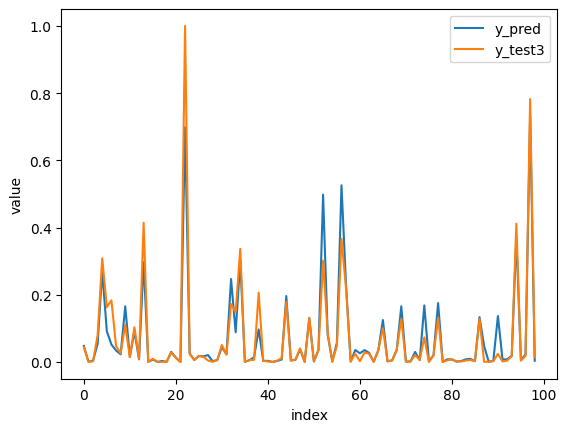

In [ ]:
start = time.time()
stacking = StackingRegressor(regressors=[catboost, random_forest], meta_regressor=huber)
stacking.fit(X_train3, y_train3)
y_pred = stacking.predict(X_test3)
end = time.time()
duration = end - start
duration = duration + dur1 + dur2 + dur3

mae, mse, rmse = evaluation(y_test3, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(stacking, X3, y3)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test3, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test3, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

new_row = {"Model": "StackingRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
models3 = models3.append(new_row, ignore_index=True)
new_row = {"Model": "StackingRegressor (3)", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
stacking_models = stacking_models.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test3, label='y_test3')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
4:	learn: 0.1463163	total: 2.83ms	remaining: 563ms
5:	learn: 0.1454794	total: 3.37ms	remaining: 559ms
6:	learn: 0.1448085	total: 3.93ms	remaining: 558ms
7:	learn: 0.1439796	total: 4.47ms	remaining: 554ms
8:	learn: 0.1431788	total: 5.07ms	remaining: 558ms
9:	learn: 0.1423956	total: 5.37ms	remaining: 531ms
10:	learn: 0.1416107	total: 5.91ms	remaining: 531ms
11:	learn: 0.1408390	total: 6.51ms	remaining: 536ms
12:	learn: 0.1400982	total: 6.83ms	remaining: 519ms
13:	learn: 0.1393022	total: 7.14ms	remaining: 503ms
14:	learn: 0.1385730	total: 7.74ms	remaining: 509ms
15:	learn: 0.1378485	total: 8.47ms	remaining: 521ms
16:	learn: 0.1370705	total: 8.79ms	remaining: 508ms
17:	learn: 0.1363631	total: 9.41ms	remaining: 513ms
18:	learn: 0.1356041	total: 10ms	remaining: 518ms
19:	learn: 0.1348272	total: 10.6ms	remaining: 519ms
20:	learn: 0.1340295	total: 11.1ms	remaining: 518ms
21:	learn: 0.1333778	total: 11.7ms	remaining: 519ms
22:	learn: 0.1327528	

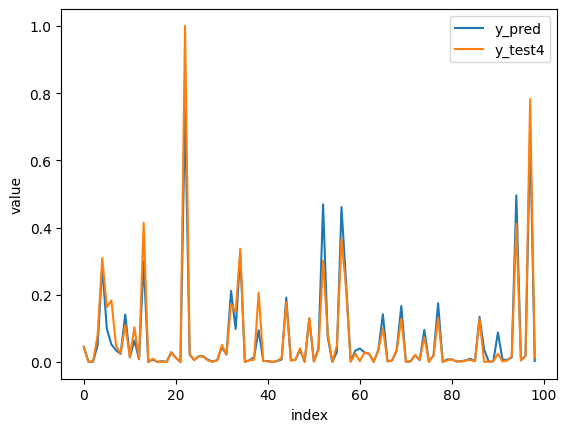

In [ ]:
start = time.time()
stacking = StackingRegressor(regressors=[catboost, random_forest], meta_regressor=huber)
stacking.fit(X_train4, y_train4)
y_pred = stacking.predict(X_test4)
end = time.time()
duration = end - start
duration = duration + dur1 + dur2 + dur3

mae, mse, rmse = evaluation(y_test4, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(stacking, X4, y4)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test4, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test4, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

new_row = {"Model": "StackingRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
models4 = models4.append(new_row, ignore_index=True)
new_row = {"Model": "StackingRegressor (4)", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
stacking_models = stacking_models.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test4, label='y_test4')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
4:	learn: 0.1462001	total: 3.26ms	remaining: 649ms
5:	learn: 0.1452822	total: 3.86ms	remaining: 640ms
6:	learn: 0.1443771	total: 4.42ms	remaining: 628ms
7:	learn: 0.1434600	total: 4.73ms	remaining: 587ms
8:	learn: 0.1426753	total: 5.29ms	remaining: 583ms
9:	learn: 0.1418182	total: 5.85ms	remaining: 580ms
10:	learn: 0.1409732	total: 6.39ms	remaining: 574ms
11:	learn: 0.1401490	total: 6.93ms	remaining: 571ms
12:	learn: 0.1394049	total: 7.48ms	remaining: 568ms
13:	learn: 0.1385458	total: 8.02ms	remaining: 565ms
14:	learn: 0.1377667	total: 8.57ms	remaining: 563ms
15:	learn: 0.1369582	total: 9.12ms	remaining: 561ms
16:	learn: 0.1362059	total: 9.7ms	remaining: 561ms
17:	learn: 0.1354543	total: 10.3ms	remaining: 560ms
18:	learn: 0.1347256	total: 10.8ms	remaining: 558ms
19:	learn: 0.1340039	total: 11.4ms	remaining: 558ms
20:	learn: 0.1332200	total: 12ms	remaining: 558ms
21:	learn: 0.1324075	total: 12.5ms	remaining: 556ms
22:	learn: 0.1316562	t

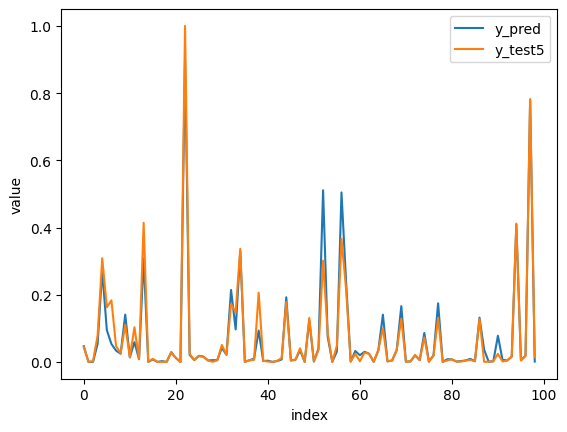

In [ ]:
start = time.time()
stacking = StackingRegressor(regressors=[catboost, random_forest], meta_regressor=huber)
stacking.fit(X_train5, y_train5)
y_pred = stacking.predict(X_test5)
end = time.time()
duration = end - start
duration = duration + dur1 + dur2 + dur3

mae, mse, rmse = evaluation(y_test5, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
rmse_cross_val = rmse_cv(stacking, X5, y5)
print("RMSE Cross-Validation:", rmse_cross_val)
pred = func(y_pred)
acc = accuracy_score(test5, pred)
print("Accuracy:", acc)
mape = cal_mape(y_test5, y_pred)
print("MAPE:", mape)
acc_mape = 1 - mape
print("Accuracy (MAPE):", acc_mape)

new_row = {"Model": "StackingRegressor", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
models5 = models5.append(new_row, ignore_index=True)
new_row = {"Model": "StackingRegressor (5)", "Duration": duration, "MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val, "MAPE": mape, "Accuracy": acc, "Accuracy (MAPE)": acc_mape}
stacking_models = stacking_models.append(new_row, ignore_index=True)

index = np.arange(len(y_pred))
plt.plot(index, y_pred, label='y_pred')
plt.plot(index, y_test5, label='y_test5')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

## **Evaluation**

### **Result**

**Patient ID, Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine**

In [ ]:
mae = models1.sort_values(by="MAE").reset_index(drop=True)
mse = models1.sort_values(by="MSE").reset_index(drop=True)
rmse = models1.sort_values(by="RMSE").reset_index(drop=True)
rmsecv = models1.sort_values(by="RMSE (Cross-Validation)").reset_index(drop=True)
acc = models1.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
mape = models1.sort_values(by="MAPE", ascending=False).reset_index(drop=True)
accmape = models1.sort_values(by="Accuracy (MAPE)", ascending=False).reset_index(drop=True)

mods = np.array(models1['Model'])
scores = []

def score(df):
  for mod in mods:
    score = 0
    index = mae[mae['Model'] == mod].index
    score += index
    index = mse[mse['Model'] == mod].index
    score += index
    index = rmse[rmse['Model'] == mod].index
    score += index
    index = rmsecv[rmsecv['Model'] == mod].index
    score += index
    index = acc[acc['Model'] == mod].index
    score += index
    index = mape[mape['Model'] == mod].index
    score += index
    index = accmape[accmape['Model'] == mod].index
    score += index
    scores.append(score)

score(models1)
models1['Score'] = pd.DataFrame(scores)
models1['Rank'] = models1['Score'].rank().astype(int)
models1.sort_values(by="Rank").reset_index(drop=True)

Model  Duration       MAE       MSE      RMSE  \
0  RandomForestRegressor  0.492097  0.020631  0.003027  0.055015   
1      StackingRegressor  2.990876  0.019911  0.002648  0.051458   
2      CatBoostRegressor  1.615535  0.024466  0.004283  0.065444   
3                  Huber  0.037916  0.066039  0.025684  0.160264   

   RMSE (Cross-Validation)      MAPE  Accuracy  Accuracy (MAPE)  Score  Rank  
0                 0.071476  0.019865       1.0         0.980135      8     1  
1                 0.072070  0.018887       1.0         0.981113      8     1  
2                 0.063801  0.187461       1.0         0.812539     11     3  
3                 0.151401  0.090586       1.0         0.909414     15     4

**Age, Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine**

In [ ]:
mae = models2.sort_values(by="MAE").reset_index(drop=True)
mse = models2.sort_values(by="MSE").reset_index(drop=True)
rmse = models2.sort_values(by="RMSE").reset_index(drop=True)
rmsecv = models2.sort_values(by="RMSE (Cross-Validation)").reset_index(drop=True)
acc = models2.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
mape = models2.sort_values(by="MAPE", ascending=False).reset_index(drop=True)
accmape = models2.sort_values(by="Accuracy (MAPE)", ascending=False).reset_index(drop=True)

mods = np.array(models2['Model'])
scores = []

def score(df):
  for mod in mods:
    score = 0
    index = mae[mae['Model'] == mod].index
    score += index
    index = mse[mse['Model'] == mod].index
    score += index
    index = rmse[rmse['Model'] == mod].index
    score += index
    index = rmsecv[rmsecv['Model'] == mod].index
    score += index
    index = acc[acc['Model'] == mod].index
    score += index
    index = mape[mape['Model'] == mod].index
    score += index
    index = accmape[accmape['Model'] == mod].index
    score += index
    scores.append(score)

score(models2)
models2['Score'] = pd.DataFrame(scores)
models2['Rank'] = models2['Score'].rank().astype(int)
models2.sort_values(by="Rank").reset_index(drop=True)

Model  Duration       MAE       MSE      RMSE  \
0  RandomForestRegressor  0.570004  0.020689  0.002441  0.049406   
1      CatBoostRegressor  2.420026  0.021812  0.002811  0.053020   
2      StackingRegressor  2.895964  0.020519  0.002279       NaN   
3                  Huber  0.030156  0.054076  0.019625  0.140089   

   RMSE (Cross-Validation)      MAPE  Accuracy  Accuracy (MAPE)  Score  Rank  
0                 0.069169  0.018677       1.0         0.981323      8     1  
1                 0.066288  0.026117       1.0         0.973883     10     2  
2                 0.068977  0.018475       1.0         0.981525     10     2  
3                 0.228322  0.049988       1.0         0.950012     14     4

**Patient ID, Age, Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine**

In [ ]:
mae = models3.sort_values(by="MAE").reset_index(drop=True)
mse = models3.sort_values(by="MSE").reset_index(drop=True)
rmse = models3.sort_values(by="RMSE").reset_index(drop=True)
rmsecv = models3.sort_values(by="RMSE (Cross-Validation)").reset_index(drop=True)
acc = models3.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
mape = models3.sort_values(by="MAPE", ascending=False).reset_index(drop=True)
accmape = models3.sort_values(by="Accuracy (MAPE)", ascending=False).reset_index(drop=True)

mods = np.array(models3['Model'])
scores = []

def score(df):
  for mod in mods:
    score = 0
    index = mae[mae['Model'] == mod].index
    score += index
    index = mse[mse['Model'] == mod].index
    score += index
    index = rmse[rmse['Model'] == mod].index
    score += index
    index = rmsecv[rmsecv['Model'] == mod].index
    score += index
    index = acc[acc['Model'] == mod].index
    score += index
    index = mape[mape['Model'] == mod].index
    score += index
    index = accmape[accmape['Model'] == mod].index
    score += index
    scores.append(score)

score(models3)
models3['Score'] = pd.DataFrame(scores)
models3['Rank'] = models3['Score'].rank().astype(int)
models3.sort_values(by="Rank").reset_index(drop=True)

Model  Duration       MAE       MSE      RMSE  \
0      StackingRegressor  4.068712  0.020873  0.002549  0.050489   
1  RandomForestRegressor  0.634641  0.021912  0.002828  0.053175   
2      CatBoostRegressor  1.629004  0.024715  0.003980  0.063084   
3                  Huber  0.030838  0.066858  0.026243  0.161998   

   RMSE (Cross-Validation)      MAPE  Accuracy  Accuracy (MAPE)  Score  Rank  
0                 0.072121  0.021061       1.0         0.978939      7     1  
1                 0.072705  0.021578       1.0         0.978422      9     2  
2                 0.069828  0.045785       1.0         0.954215     11     3  
3                 0.147398  0.062078       1.0         0.937922     15     4

**Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine**

In [ ]:
mae = models4.sort_values(by="MAE").reset_index(drop=True)
mse = models4.sort_values(by="MSE").reset_index(drop=True)
rmse = models4.sort_values(by="RMSE").reset_index(drop=True)
rmsecv = models4.sort_values(by="RMSE (Cross-Validation)").reset_index(drop=True)
acc = models4.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
mape = models4.sort_values(by="MAPE", ascending=False).reset_index(drop=True)
accmape = models4.sort_values(by="Accuracy (MAPE)", ascending=False).reset_index(drop=True)

mods = np.array(models4['Model'])
scores = []

def score(df):
  for mod in mods:
    score = 0
    index = mae[mae['Model'] == mod].index
    score += index
    index = mse[mse['Model'] == mod].index
    score += index
    index = rmse[rmse['Model'] == mod].index
    score += index
    index = rmsecv[rmsecv['Model'] == mod].index
    score += index
    index = acc[acc['Model'] == mod].index
    score += index
    index = mape[mape['Model'] == mod].index
    score += index
    index = accmape[accmape['Model'] == mod].index
    score += index
    scores.append(score)

score(models4)
models4['Score'] = pd.DataFrame(scores)
models4['Rank'] = models4['Score'].rank().astype(int)
models4.sort_values(by="Rank").reset_index(drop=True)

Model  Duration       MAE       MSE      RMSE  \
0  RandomForestRegressor  0.609939  0.018881  0.002114  0.045977   
1      StackingRegressor  2.782792  0.018263  0.001845  0.042953   
2      CatBoostRegressor  1.208729  0.022421  0.003533  0.059438   
3                  Huber  0.067091  0.054137  0.019634  0.140121   

   RMSE (Cross-Validation)      MAPE  Accuracy  Accuracy (MAPE)  Score  Rank  
0                 0.068966  0.016696       1.0         0.983304      8     1  
1                 0.069068  0.016065       1.0         0.983935      8     1  
2                 0.068821  0.021143       1.0         0.978857     11     3  
3                 0.228178  0.054397       1.0         0.945603     15     4

**Quantitative UACR and Urinary Creatinine**

In [ ]:
mae = models5.sort_values(by="MAE").reset_index(drop=True)
mse = models5.sort_values(by="MSE").reset_index(drop=True)
rmse = models5.sort_values(by="RMSE").reset_index(drop=True)
rmsecv = models5.sort_values(by="RMSE (Cross-Validation)").reset_index(drop=True)
acc = models5.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
mape = models5.sort_values(by="MAPE", ascending=False).reset_index(drop=True)
accmape = models5.sort_values(by="Accuracy (MAPE)", ascending=False).reset_index(drop=True)

mods = np.array(models5['Model'])
scores = []

def score(df):
  for mod in mods:
    score = 0
    index = mae[mae['Model'] == mod].index
    score += index
    index = mse[mse['Model'] == mod].index
    score += index
    index = rmse[rmse['Model'] == mod].index
    score += index
    index = rmsecv[rmsecv['Model'] == mod].index
    score += index
    index = acc[acc['Model'] == mod].index
    score += index
    index = mape[mape['Model'] == mod].index
    score += index
    index = accmape[accmape['Model'] == mod].index
    score += index
    scores.append(score)

score(models5)
models5['Score'] = pd.DataFrame(scores)
models5['Rank'] = models5['Score'].rank().astype(int)
models5.sort_values(by="Rank").reset_index(drop=True)

Model  Duration       MAE       MSE      RMSE  \
0      CatBoostRegressor  2.388148  0.013689  0.001002  0.031656   
1      StackingRegressor  2.783564  0.015560  0.001400  0.037410   
2  RandomForestRegressor  0.370050  0.016132  0.001552  0.039390   
3                  Huber  0.053851  0.050567  0.016365  0.127927   

   RMSE (Cross-Validation)      MAPE  Accuracy  Accuracy (MAPE)  Score  Rank  
0                 0.062438  0.027832       1.0         0.972168      5     1  
1                 0.067905  0.015781       1.0         0.984219     10     2  
2                 0.068132  0.016077       1.0         0.983923     12     3  
3                 0.228249  0.046501       1.0         0.953499     15     4

### **Stacking Regression**

In [ ]:
mae = stacking_models.sort_values(by="MAE").reset_index(drop=True)
mse = stacking_models.sort_values(by="MSE").reset_index(drop=True)
rmse = stacking_models.sort_values(by="RMSE").reset_index(drop=True)
rmsecv = stacking_models.sort_values(by="RMSE (Cross-Validation)").reset_index(drop=True)
acc = stacking_models.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
mape = stacking_models.sort_values(by="MAPE", ascending=False).reset_index(drop=True)
accmape = stacking_models.sort_values(by="Accuracy (MAPE)", ascending=False).reset_index(drop=True)

mods = np.array(stacking_models['Model'])
scores = []

def score(df):
  for mod in mods:
    score = 0
    index = mae[mae['Model'] == mod].index
    score += index
    index = mse[mse['Model'] == mod].index
    score += index
    index = rmse[rmse['Model'] == mod].index
    score += index
    index = rmsecv[rmsecv['Model'] == mod].index
    score += index
    index = acc[acc['Model'] == mod].index
    score += index
    index = mape[mape['Model'] == mod].index
    score += index
    index = accmape[accmape['Model'] == mod].index
    score += index
    scores.append(score)

score(stacking_models)
stacking_models['Score'] = pd.DataFrame(scores)
stacking_models['Rank'] = stacking_models['Score'].rank().astype(int)
stacking_models.sort_values(by="Rank").reset_index(drop=True)

Model  Duration       MAE       MSE      RMSE  \
0  StackingRegressor (5)  2.783564  0.015560  0.001400  0.037410   
1  StackingRegressor (4)  2.782792  0.018263  0.001845  0.042953   
2  StackingRegressor (2)  2.895964  0.020519  0.002279  0.047739   
3  StackingRegressor (1)  2.990876  0.019911  0.002648  0.051458   
4  StackingRegressor (3)  4.068712  0.020873  0.002549  0.050489   

   RMSE (Cross-Validation)      MAPE  Accuracy  Accuracy (MAPE)  Score  Rank  
0                 0.067905  0.015781       1.0         0.984219      8     1  
1                 0.069068  0.016065       1.0         0.983935     12     2  
2                 0.068977  0.018475       1.0         0.981525     13     3  
3                 0.072070  0.018887       1.0         0.981113     17     4  
4                 0.072121  0.021061       1.0         0.978939     20     5

Notes:
1. Patient ID, Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine
2. Age, Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine
3. Patient ID, Age, Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine
4. Semi-quantitative UACR, Quantitative UACR, and Urinary Creatinine
5. Quantitative UACR and Urinary Creatinine

Best at number 5, but Stacking Regression is worse than other models.
